<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Travis! 

I'm happy to review your project today 🙌

My name is **Gerardo Flores** and you can find me on the HUB as https://hub.tripleten.com/u/dea170e1

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue, or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>

<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project

</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid red 2px; padding: 20px">
<b>Reviewer's comment v1:</b>

    
<b>Overall Feedback</b>
    
Hello Travis,

My name is **Gerardo Flores** and you can find me on the HUB as https://hub.tripleten.com/u/dea170e1
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v1:` section.

**🚧 Suggested Tweaks & Areas for Attention**


- Don't forget to answer all questions.
   

Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄

If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>

    
<b>Overall Feedback</b>
    
Hello Travis,

My name is **Gerardo Flores** and you can find me on the HUB as https://hub.tripleten.com/u/dea170e1
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, it is approved.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v2:` section.


If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! This information could be helpful for the notebook reader.



In [1]:
# Import all required libraries

# Import core data manipulation libraries
import pandas as pd       # For working with DataFrames and structured data
import numpy as np        # For numerical operations and array handling
import random             # For generating random numbers or selections
import math as mt         # For basic mathematical functions (e.g., sqrt, log)

# Import visualization and statistical libraries
import seaborn as sns     # For advanced statistical plotting
from matplotlib import pyplot as plt  # For basic plotting functions

# Import specialized mathematical and statistical tools
from math import factorial            # For computing factorials (combinatorics, probability)
from scipy import stats as st         # For statistical functions (e.g., distributions, tests)
from scipy.stats import ttest_ind     # For independent two-sample t-tests

# Import data preprocessing tool
from sklearn.impute import SimpleImputer  # For handling missing values via imputation

# Configure pandas display settings for better readability
pd.set_option('display.max_columns', None)  # Ensure all columns are visible when printing DataFrames
pd.set_option('display.width', 1000)        # Set display width to 1000 characters to prevent line wrapping

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset

df = pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset

print(df.head())
print()
df.describe()
print()
df.info()
print()
print(df.shape)
print()
print(df.columns)

                       Name Platform  Year_of_Release         Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating
0                Wii Sports      Wii           2006.0        Sports     41.36     28.96      3.77         8.45          76.0          8      E
1         Super Mario Bros.      NES           1985.0      Platform     29.08      3.58      6.81         0.77           NaN        NaN    NaN
2            Mario Kart Wii      Wii           2008.0        Racing     15.68     12.76      3.79         3.29          82.0        8.3      E
3         Wii Sports Resort      Wii           2009.0        Sports     15.61     10.93      3.28         2.95          80.0          8      E
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27      8.89     10.22         1.00           NaN        NaN    NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null 

In [4]:
# Check for duplicate entries

df.duplicated().sum()

0

### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?


# What's the total number of records in our dataset?
    - 16,715

# What data types are present in each column?
    - Column           Dtype  
    - ------           -----  
    - Name             object 
    - Platform         object 
    - Year_of_Release  float64
    - Genre            object 
    - NA_sales         float64
    - EU_sales         float64
    - JP_sales         float64
    - Other_sales      float64
    - Critic_Score     float64
    - User_Score       object 
    - Rating           object 

# Are there any obvious issues with the data?
    - Yes — several stand out:
        - Missing values:
            - Critic_Score has only 8137 non-null entries → ~51% missing.
            - User_Score and Rating also have substantial gaps.
            - Even Year_of_Release is missing in 269 records.
        - Data type anomaly:
            - User_Score is stored as object instead of numeric — likely due to entries like 'tbd' or other non-numeric strings.

# Do we see any immediate patterns or anomalies?
    - Sales skew:
        - Some games (e.g., Wii Sports) have extremely high sales in NA and EU, suggesting regional dominance.
        - Pokemon Red/Blue shows strong JP sales, highlighting regional preferences.
    - Critic/User score gaps:
        - Older games (e.g., Super Mario Bros., Pokemon Red) lack critic/user scores — likely due to historical data limitations.

<div class="alert alert-danger">

<b>Reviewer's comment v1</b>
 
Don't forget to answer the questions.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done!

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase

df.columns = df.columns.str.lower()

In [6]:
# Verify the changes

print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], dtype='object')


### 2.2 Data Type Conversion

In [7]:
# Check current data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

In [9]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.


# Replace infinite values in 'year_of_release' with NaN
# Ensures that invalid entries like inf/-inf don't disrupt analysis
df['year_of_release'] = df['year_of_release'].replace([np.inf, -np.inf], np.nan)

# Fill missing 'year_of_release' values with -1 and convert to integer
# Temporarily marks missing years for filtering while ensuring consistent data type
df['year_of_release'] = df['year_of_release'].fillna(-1).astype(int)

# Ensure 'year_of_release' is stored as integer (redundant if already converted above)
df['year_of_release'] = df['year_of_release'].astype(int)

# Convert 'user_score' to float for numerical analysis
# Necessary for statistical tests, aggregations, and visualizations
df['user_score'] = df['user_score'].astype(float)

# Remove rows where 'year_of_release' was missing (marked as -1)
# Final cleanup to exclude incomplete or unreliable entries
df = df[df["year_of_release"] != -1]

# Display unique release years to verify the cleaned range
print(df['year_of_release'].unique())
print()

# Display unique user scores to inspect distribution and detect anomalies
print(df['user_score'].unique())

# Show DataFrame structure, column types, and non-null counts
# Useful for confirming data integrity before analysis
df.info()

[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1995 1991 1981 1987 1980 1983]

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-nu

### 2.3 Handling Missing Values

In [10]:
# Examine missing values

print(df.isnull().any())

name                True
platform           False
year_of_release    False
genre               True
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score        True
user_score          True
rating              True
dtype: bool


In [11]:
# Calculate percentage of missing values

percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

name                0.012161
platform            0.000000
year_of_release     0.000000
genre               0.012161
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.459321
user_score         54.621184
rating             40.605618
dtype: float64


                     name  platform  year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score    rating
name             1.000000       NaN              NaN  1.000000       NaN       NaN       NaN          NaN      0.010711    0.010052  0.013338
platform              NaN       NaN              NaN       NaN       NaN       NaN       NaN          NaN           NaN         NaN       NaN
year_of_release       NaN       NaN              NaN       NaN       NaN       NaN       NaN          NaN           NaN         NaN       NaN
genre            1.000000       NaN              NaN  1.000000       NaN       NaN       NaN          NaN      0.010711    0.010052  0.013338
na_sales              NaN       NaN              NaN       NaN       NaN       NaN       NaN          NaN           NaN         NaN       NaN
eu_sales              NaN       NaN              NaN       NaN       NaN       NaN       NaN          NaN           NaN         NaN       NaN
jp_sal

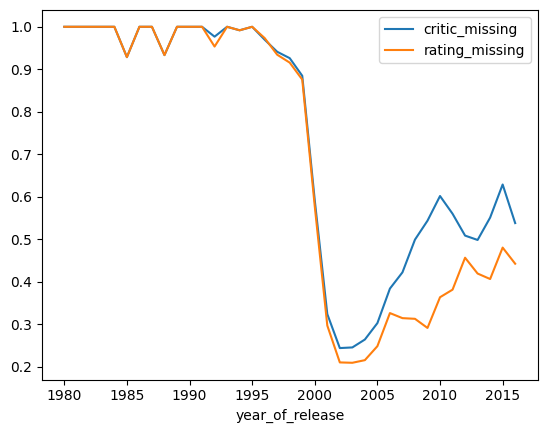

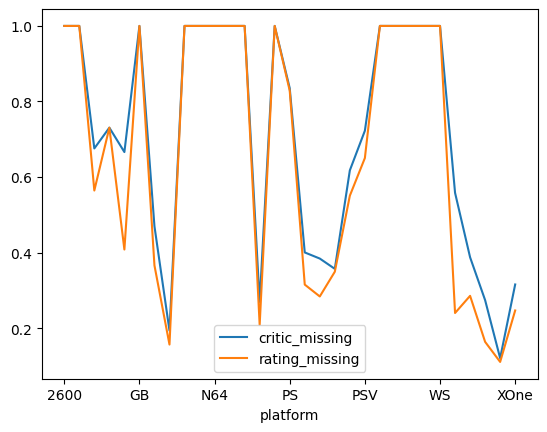

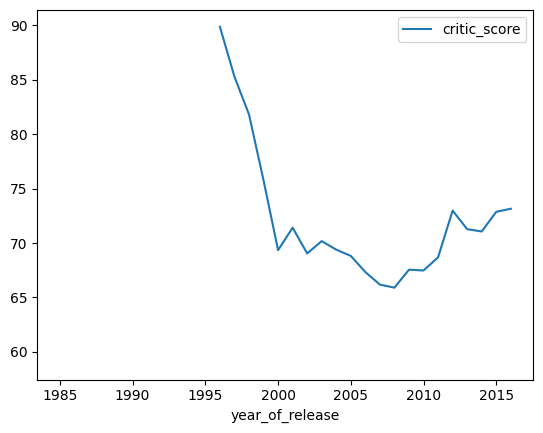

In [12]:
# Analyze patterns in missing values

# Create a correlation matrix of missing values across all columns
# Converts boolean missing indicators to integers (0 = present, 1 = missing)
# Helps identify whether missingness in one column is related to others
missing_corr = df.isnull().astype(int).corr()
print(missing_corr)

# Create binary flags for missing values in key columns
# These will be used for correlation and trend analysis
df['critic_missing'] = df['critic_score'].isnull().astype(int)  # 1 if critic_score is missing
df['user_missing'] = df['user_score'].isnull().astype(int)      # 1 if user_score is missing
df['rating_missing'] = df['rating'].isnull().astype(int)        # 1 if rating is missing

print()

# Compute correlation matrix between sales, scores, and missingness indicators
# Reveals whether missing data is associated with sales or user ratings
print(df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
          'critic_missing', 'user_score', 'user_missing', 'rating_missing']].corr())
print()

# Plot average missingness over time for critic and rating data
# Helps detect whether data quality improved or worsened across release years
print(df.groupby('year_of_release')[['critic_missing', 'rating_missing']].mean().plot())
print()

# Plot average missingness by platform
# Reveals whether certain platforms have systematically lower data coverage
print(df.groupby('platform')[['critic_missing', 'rating_missing']].mean().plot())
print()

# Plot average critic score over time
# Useful for identifying trends in review sentiment across release years
print(df.groupby('year_of_release')[['critic_score']].mean().plot())


AxesSubplot(0.125,0.11;0.775x0.77)

AxesSubplot(0.125,0.11;0.775x0.77)


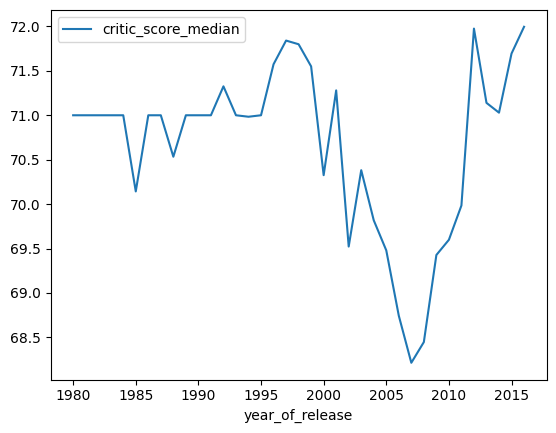

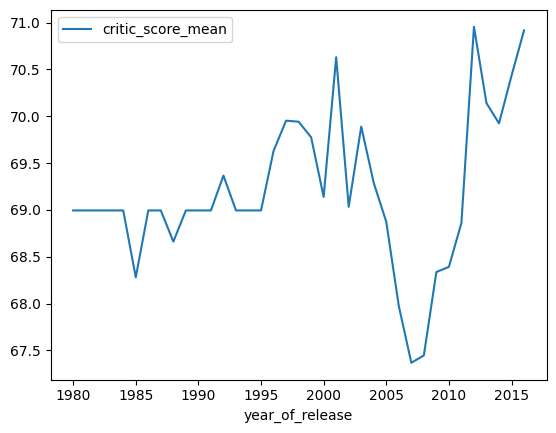

In [13]:
# Create a SimpleImputer to fill missing critic scores using the median value
# Median is robust to outliers and preserves central tendency
imputer = SimpleImputer(strategy='median')

# Create a new column to store critic scores with median imputation
df['critic_score_median'] = df['critic_score']

# Apply median imputation to fill missing values in 'critic_score'
df['critic_score_median'] = imputer.fit_transform(df[['critic_score']])

# Plot average median-imputed critic scores by year of release
# Helps visualize how critic sentiment trends over time with missing data handled
print()
print(df.groupby('year_of_release')[['critic_score_median']].mean().plot())

# Create a SimpleImputer to fill missing critic scores using the mean value
# Mean is sensitive to outliers but reflects overall average
imputer = SimpleImputer(strategy='mean')

# Create a new column to store critic scores with mean imputation
df['critic_score_mean'] = df['critic_score']

# Apply mean imputation to fill missing values in 'critic_score'
df['critic_score_mean'] = imputer.fit_transform(df[['critic_score']])

# Plot average mean-imputed critic scores by year of release
# Allows comparison with median-imputed results to assess impact of imputation strategy
print()
print(df.groupby('year_of_release')[['critic_score_mean']].mean().plot())

In [14]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy

# No changes

# Why do you think the values are missing? Give possible reasons.

## 1980–1995:

    Early video game industry: This was the formative period of gaming, with limited digital record-keeping.

    Lack of centralized reviews: Critics and user scores weren’t widely tracked or published online.

    Data archival gaps: Many games from this era were released before the internet became mainstream, so metadata like ratings and scores may simply not exist.

    Interpretation: The missing data here is likely due to historical limitations—these games weren’t reviewed or rated in a structured way.

## 1995–2003:

    Rise of gaming journalism: Websites like IGN, GameSpot, and Metacritic began aggregating reviews.

    Internet adoption: More users could submit scores and ratings online.

    Industry standardization: Publishers began consistently providing metadata like ratings and critic scores.

    Interpretation: This window reflects a sweet spot where games were well-documented, and the infrastructure for collecting reviews was strong.

## Post-2003:

    Explosion of platforms: Mobile games, indie titles, and digital-only releases surged—many of which didn’t receive formal reviews.

    User fatigue or decentralization: With so many games, not all received attention from critics or users.

    Rating system changes: Some platforms (e.g., app stores) use different rating systems or don’t require ESRB-style ratings.

    Interpretation: The rise in nulls may reflect oversaturation, decentralization, or shifts in how games are distributed and reviewed.

# Explain why you filled in the missing values as you did or why you decided to leave them blank.

## Why I didn’t fill NaNs here
- Filling NaNs could imply a relationship where none exists.
- It could mislead downstream analysis, especially if you're using this for feature selection, PCA, or modeling.
- These NaNs are informative—they tell you which variables are incompatible for correlation.

## Why leaving NaNs is the right call
- Preserves data integrity: You're basing insights on what’s actually known, not interpolated guesses.
- Avoids misleading conclusions: Imputed values can distort trends, especially in sales or ratings.
- Highlights gaps: Missing data can signal areas where the company lacks visibility—valuable in itself for marketing strategy.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great conclusions! The strategy is correct.

### 2.4 Calculate Total Sales

In [15]:
# Calculate total sales across all regions and put them in a different column

df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

print(df.head(5))

                       name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  critic_missing  user_missing  rating_missing  critic_score_median  critic_score_mean  total_sales
0                Wii Sports      Wii             2006        Sports     41.36     28.96      3.77         8.45          76.0         8.0      E               0             0               0                 76.0          76.000000        82.54
1         Super Mario Bros.      NES             1985      Platform     29.08      3.58      6.81         0.77           NaN         NaN    NaN               1             1               1                 71.0          68.994363        40.24
2            Mario Kart Wii      Wii             2008        Racing     15.68     12.76      3.79         3.29          82.0         8.3      E               0             0               0                 82.0          82.000000        35.52
3         Wii Sports Resort 

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [16]:
# Create a DataFrame with game releases by year

# Group and count releases
df_releases_by_year = df.groupby(['year_of_release', 'platform', 'genre'])['name'].count().to_frame(name='release_count')

# Group and sum total_sales
sales_by_year = df.groupby(['year_of_release', 'platform', 'genre'])['total_sales'].sum()

# Merge the sales data into the release count dataframe
df_releases_by_year = df_releases_by_year.merge(sales_by_year, on=['year_of_release', 'platform', 'genre'])

# Reset index if you want a flat dataframe
df_releases_by_year = df_releases_by_year.reset_index()

print(df_releases_by_year)

      year_of_release platform         genre  release_count  total_sales
0                1980     2600        Action              1         0.34
1                1980     2600      Fighting              1         0.77
2                1980     2600          Misc              4         2.70
3                1980     2600       Shooter              2         7.07
4                1980     2600        Sports              1         0.50
...               ...      ...           ...            ...          ...
1804             2016     XOne  Role-Playing              4         1.32
1805             2016     XOne       Shooter             15        11.69
1806             2016     XOne    Simulation              2         0.13
1807             2016     XOne        Sports             11         6.19
1808             2016     XOne      Strategy              1         0.04

[1809 rows x 5 columns]


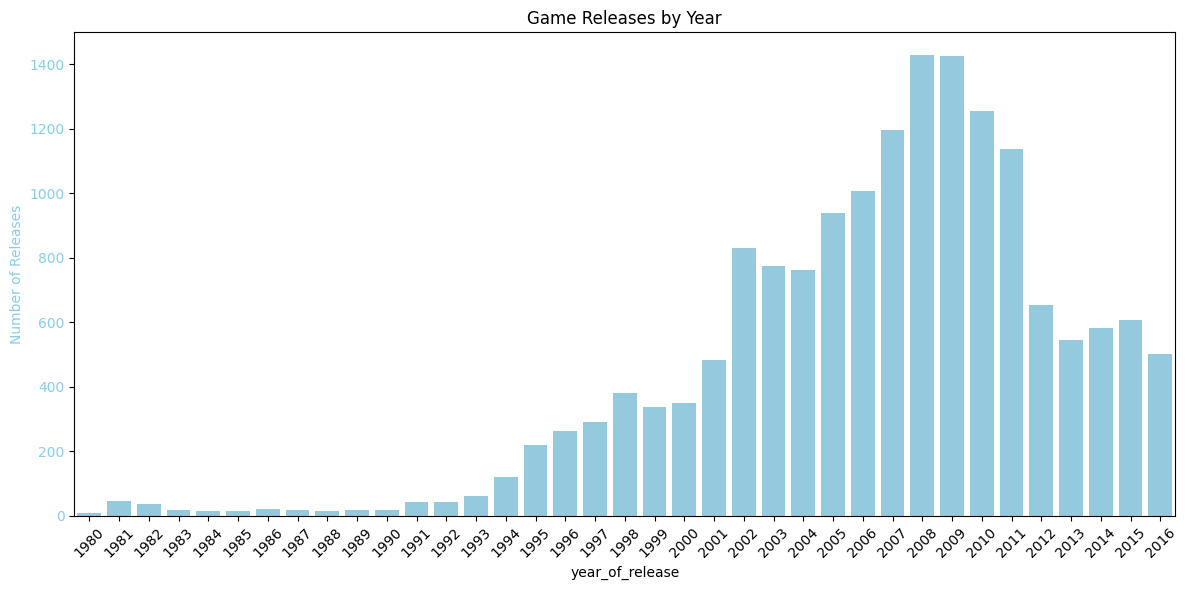

In [17]:
# Visualize the distribution of games across years

# Aggregate by year
yearly_data = df_releases_by_year.groupby('year_of_release').agg({
    'release_count': 'sum'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for release count
sns.barplot(x='year_of_release', y='release_count', data=yearly_data, color='skyblue', ax=ax1)
ax1.set_ylabel('Number of Releases', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.title('Game Releases by Year')
plt.tight_layout()
plt.show()

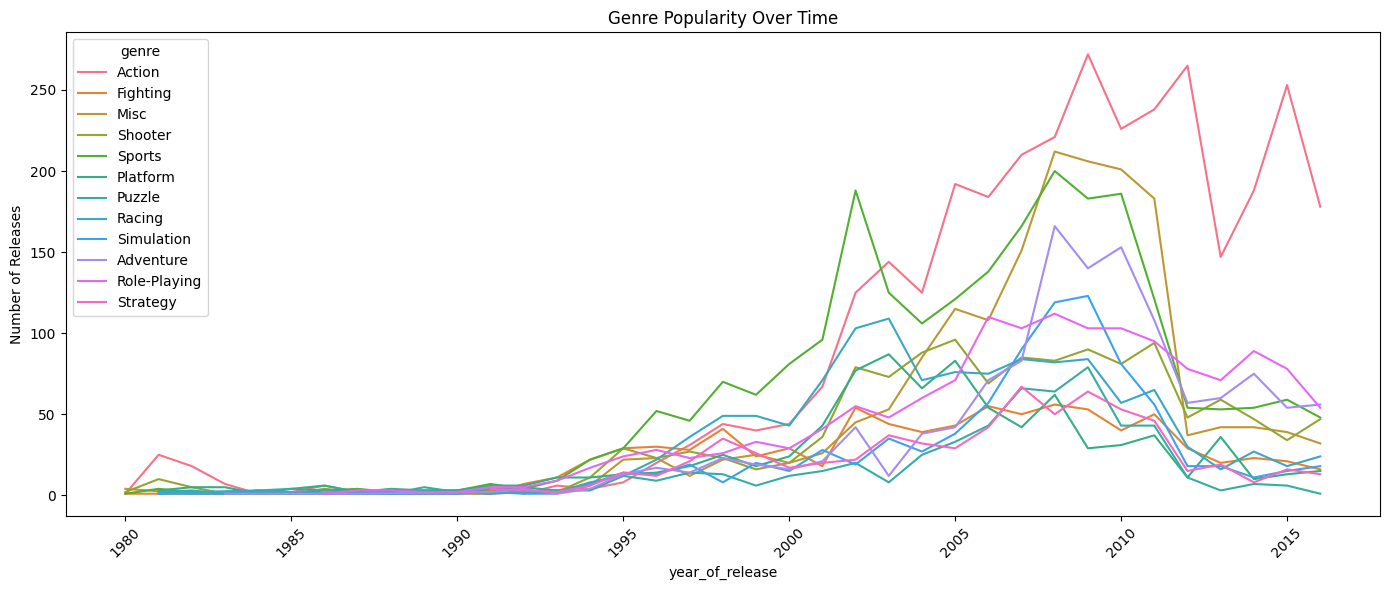

In [18]:
# Optional: genre trends over time
genre_trend = df_releases_by_year.groupby(['year_of_release', 'genre'])['release_count'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=genre_trend, x='year_of_release', y='release_count', hue='genre')
plt.title('Genre Popularity Over Time')
plt.xticks(rotation=45)
plt.ylabel('Number of Releases')
plt.tight_layout()
plt.show()


In [19]:
# Display summary statistics for each year

# Group the DataFrame by year and display summary statistics for each group
yearly_summary = df_releases_by_year.groupby('year_of_release').describe()

# Display the result
print(yearly_summary)

                release_count                                                     total_sales                                                          
                        count       mean        std  min   25%   50%    75%   max       count      mean        std   min     25%    50%      75%    max
year_of_release                                                                                                                                        
1980                      5.0   1.800000   1.303840  1.0  1.00   1.0   2.00   4.0         5.0  2.276000   2.843085  0.34  0.5000  0.770   2.7000   7.07
1981                      7.0   6.571429   8.695921  1.0  1.50   3.0   7.00  25.0         7.0  5.097143   5.645939  0.44  0.6300  2.250   8.4700  14.79
1982                      7.0   5.142857   5.871643  1.0  2.00   3.0   5.00  18.0         7.0  4.125714   3.368070  0.87  1.3150  3.810   5.7650  10.04
1983                      8.0   2.125000   2.232071  1.0  1.00   1.0   1.75   7.0       

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?


# Which years show significant numbers of game releases?
- 2006 had the highest count: 108 releases
- 2008–2010 also show elevated counts: 83–82–77 releases
- 2013–2014 and 2011 remain strong with 98–87–92 releases

# Are there any notable trends or patterns in the number of releases?
- From 1980 to early 1990s, release counts were low (mostly under 30).
- Starting mid-1990s, there's a clear upward trajectory:
    - 1994–1996: 46–50 releases
    - 2000s onward: consistently above 70, peaking in 2006
- Post-2010 shows a slight decline:
    - From 2011 (92) to 2016 (71), there's a downward drift.

# Is there enough recent data to make predictions for 2017?
- Yes
    - We have yearly data up to 2016, including:
        - Release counts
        - Mean and standard deviation of releases
    - This allows for time series modeling or regression to forecast 2017.
    - However, prediction quality depends on:
        - Whether external factors (e.g., platform shifts, industry changes) are considered
        - The volatility in recent years (e.g., SD in 2015–2016 is high)

<div class="alert alert-danger">

<b>Reviewer's comment v1</b>
 
Don't forget to answer the questions.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done!

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [20]:
# Calculate total sales by platform and year


# Group and sum total_sales
df_releases_by_platform = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().to_frame(name='total_sales')

# Reset index if you want a flat dataframe
df_releases_by_platform = df_releases_by_platform.reset_index()

print(df_releases_by_platform)


     year_of_release platform  total_sales
0               1980     2600        11.38
1               1981     2600        35.68
2               1982     2600        28.88
3               1983     2600         5.84
4               1983      NES        10.96
..               ...      ...          ...
233             2016      PSV         4.25
234             2016      Wii         0.18
235             2016     WiiU         4.60
236             2016     X360         1.52
237             2016     XOne        26.15

[238 rows x 3 columns]


In [21]:


# Aggregate by year
yearly_data = df_releases_by_platform.groupby('year_of_release').agg({
    'total_sales': 'sum'
}).reset_index()

# Group and count releases
df_releases_by_platform = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().to_frame(name='total_sales')

# Reset index if you want a flat dataframe
df_releases_by_platform = df_releases_by_platform.reset_index()

print(df_releases_by_platform)

     year_of_release platform  total_sales
0               1980     2600        11.38
1               1981     2600        35.68
2               1982     2600        28.88
3               1983     2600         5.84
4               1983      NES        10.96
..               ...      ...          ...
233             2016      PSV         4.25
234             2016      Wii         0.18
235             2016     WiiU         4.60
236             2016     X360         1.52
237             2016     XOne        26.15

[238 rows x 3 columns]


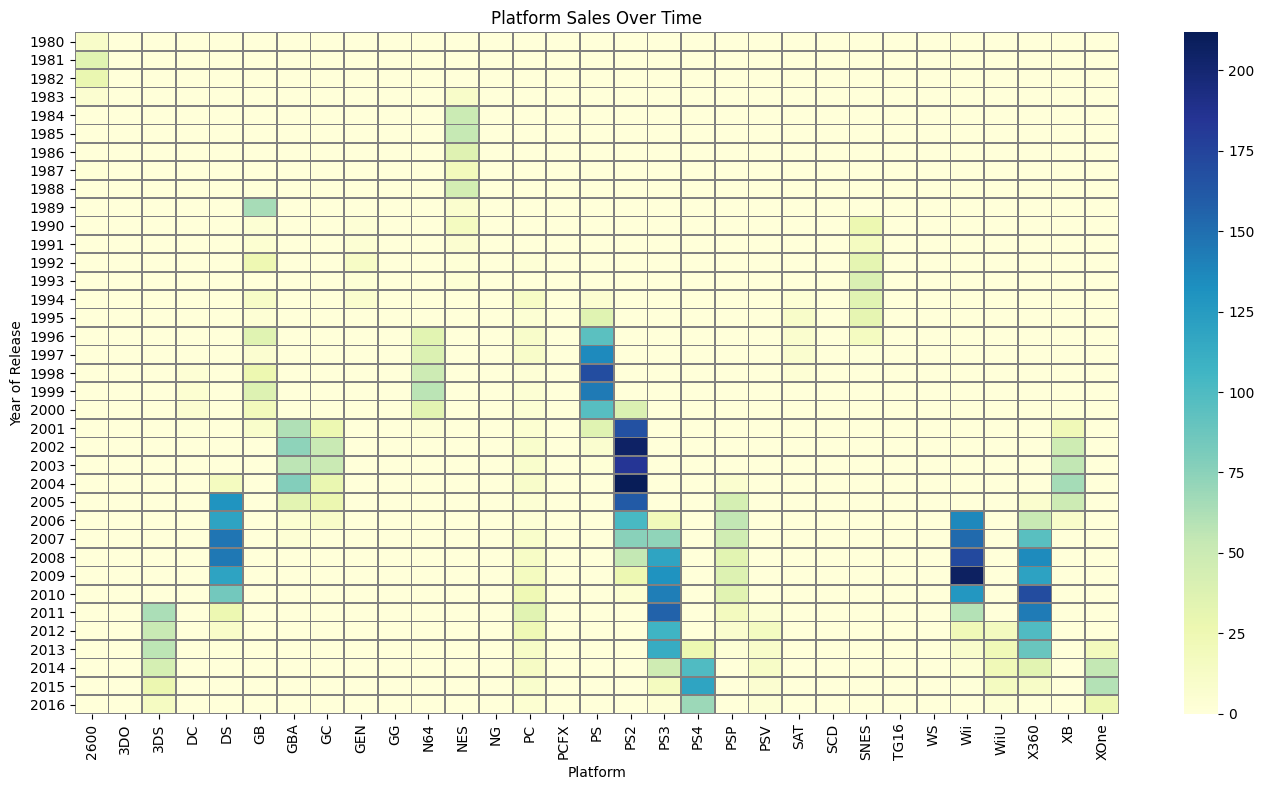

In [22]:
# Create a heatmap of platform sales over time


# Pivot the data: rows = years, columns = platforms, values = total_sales
platform_sales_pivot = df_releases_by_platform.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum',
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(platform_sales_pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Platform Sales Over Time')
plt.xlabel('Platform')
plt.ylabel('Year of Release')
plt.tight_layout()
plt.show()


Platforms ranked by sales consistency:
 platform
PC      1.168093
X360    1.907144
PS3     1.933410
PS2     1.968379
PSP     2.043401
GB      2.073906
DS      2.161872
NES     2.181310
SNES    2.196458
PS      2.317276
Wii     2.329789
3DS     2.503184
GC      2.549198
XB      2.560394
GBA     2.577882
N64     2.588849
PSV     2.603680
WiiU    2.775385
SAT     2.821876
GEN     3.073633
DC      3.194873
XOne    3.214632
PS4     3.222071
2600    3.247449
WS      3.627936
NG      3.701142
3DO     4.983082
SCD     5.012852
TG16    6.082763
GG      6.082763
PCFX    6.082763
dtype: float64


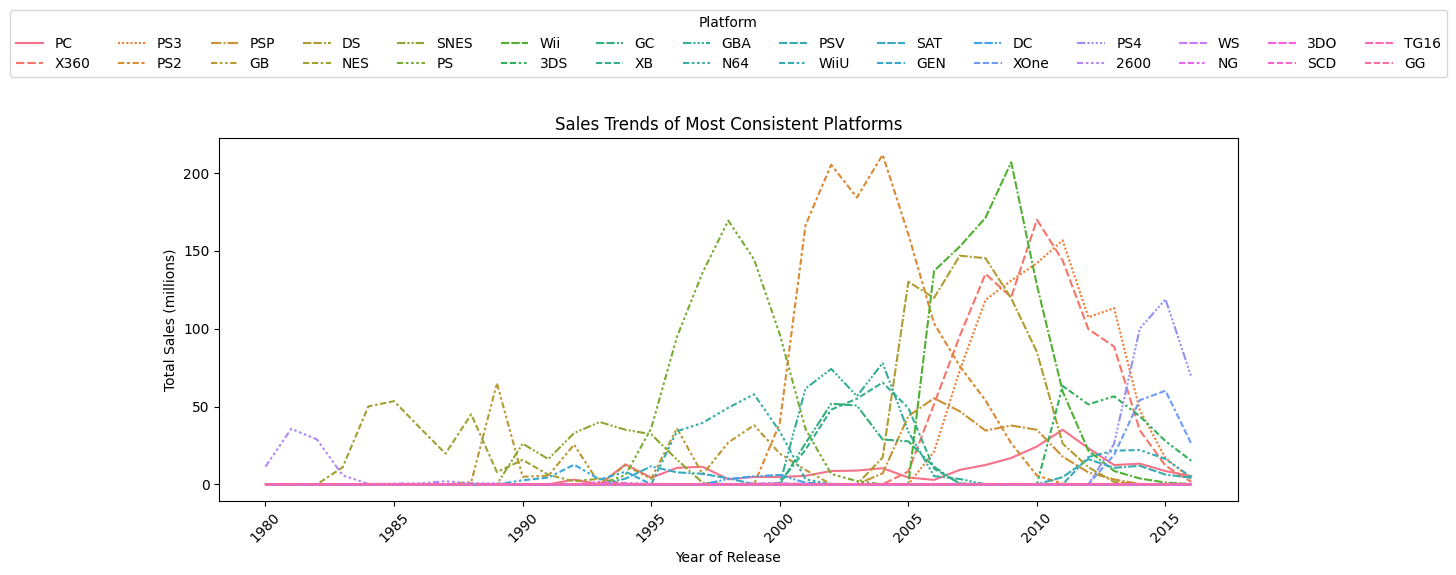

In [23]:
# Identify platforms with declining sales


# Aggregate the total sales by year of release and platform
platform_sales = df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum',
    fill_value=0
)

# Calculate mean and standard deviation across years for each platform
platform_mean = platform_sales.mean()
platform_std = platform_sales.std()

# Coefficient of Variation
platform_cv = platform_std / platform_mean

# Sort platforms by consistency (lowest CV first)
consistent_platforms = platform_cv.sort_values()
print("Platforms ranked by sales consistency:\n", consistent_platforms)

# Plot the consistent platforms in a line plot
top_consistent = consistent_platforms.head(30).index
plt.figure(figsize=(14, 6))
sns.lineplot(data=platform_sales[top_consistent])
plt.title('Sales Trends of Most Consistent Platforms')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Year of Release')
plt.xticks(rotation=45)
plt.legend(title='Platform', loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=15)
plt.tight_layout()
plt.show()

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?


1. Which platforms show consistent sales over time?
From the graph, platforms like PC, PS3, and X360 show relatively smooth curves without dramatic spikes or crashes. That suggests:
- PC: Most consistent—its line is steady across decades, reflecting ongoing relevance through digital distribution and backward compatibility.
- PS3 & X360: Though they have peaks, their sales taper gradually, indicating sustained performance over multiple years.
These platforms likely benefited from strong developer support, large user bases, and extended game libraries.

2. Can you identify platforms that have disappeared from the market?
Yes—platforms with sharp rises followed by steep declines or flatlining are likely discontinued. Examples:
- PS2: Huge peak in early 2000s, then a rapid drop—classic end-of-life pattern.
- 2600, SNES, NES, GEN, N64, GC: These show short lifecycles with clear endpoints, typical of older console generations.
- PSP & GBA: Handhelds with moderate peaks that faded as mobile gaming and newer handhelds emerged.
These disappearances often coincide with newer platform launches or shifts in consumer behavior.

3. What's the typical lifecycle of a gaming platform?
The graph reveals a pattern:
- Launch Phase: Low initial sales as adoption begins.
- Growth Phase: Rapid rise in sales—often 2–4 years post-launch.
- Peak Phase: Highest sales volume, usually sustained for 2–3 years.
- Decline Phase: Gradual or sharp drop as newer platforms emerge.
- Sunset: Sales flatten—platform is phased out or discontinued.
This lifecycle typically spans 6–10 years, depending on market success and technological shifts.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
I agree with you, at the end each lifecycle typically spans 6–10 years.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

Platforms released between 2012 & 2016.
                                name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  critic_missing  user_missing  rating_missing  critic_score_median  critic_score_mean  total_sales
16                Grand Theft Auto V      PS3             2013        Action      7.02      9.09      0.98         3.96          97.0         8.2      M               0             0               0                 97.0          97.000000        21.05
23                Grand Theft Auto V     X360             2013        Action      9.66      5.14      0.06         1.41          97.0         8.1      M               0             0               0                 97.0          97.000000        16.27
31         Call of Duty: Black Ops 3      PS4             2015       Shooter      6.03      5.86      0.36         2.38           NaN         NaN    NaN               1             1               1      

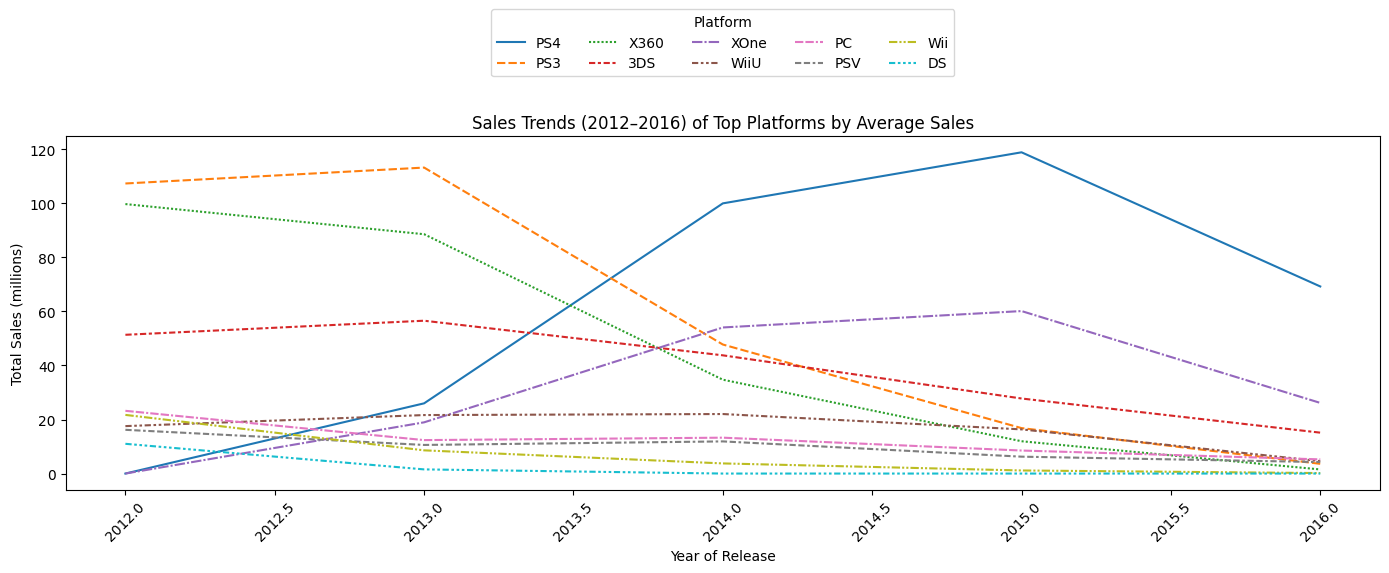

Platforms released between 2012 & 2016 and have sales over $1 million.
['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


In [24]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data


# Select the years to use in the evaluation
relevant_years = [2012, 2013, 2014, 2015, 2016]
df_relevant = df[df['year_of_release'].isin(relevant_years)]
print("Platforms released between 2012 & 2016.")
print(df_relevant)
print()

# Platforms active in 2017 as indicated by being released in the relevant years and having median value sales.
active_2017 = df[
    (df['year_of_release'] >= 2012) & 
    (df['total_sales'] >= df['total_sales'].median())
]['platform'].unique()
print("Platforms released between 2012 & 2016 and that are still have sales greater than or equeal too the median sales of all platforms.")
print(active_2017)
print()

# Select top platforms based on recent_trends
recent_sales = platform_sales.loc[2012:2016]
recent_trends = recent_sales[active_2017].mean().sort_values(ascending=False)
top_recent_platforms = recent_trends.head(10).index
# Filter the recent_sales pivot to include only top platforms
filtered_sales = recent_sales[top_recent_platforms]
print(filtered_sales)
print()

# Plot in a line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_sales)
plt.title('Sales Trends (2012–2016) of Top Platforms by Average Sales')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Year of Release')
plt.xticks(rotation=45)
plt.legend(title='Platform', loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=5)
plt.tight_layout()
plt.show()

# Platforms with sales over $1 million
platform_sales_2017 = df[(df['year_of_release'] >= 2012) & 
    (df['total_sales'] >= 1)
].groupby('platform')['total_sales'].sum()
sales_2017 = platform_sales_2017[platform_sales_2017 > 1].index.tolist()
print("Platforms released between 2012 & 2016 and have sales over $1 million.")
print(sales_2017)

### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

Recommended Time Period: 2012–2016

Why This Range Works:
- Lifecycle Relevance:
- Most platforms active in 2017 (e.g., PS4, XOne, PC) were already in market by 2013–2014.
- Including 2012 captures the tail end of previous-gen platforms (PS3, X360), helping model transitions.
- Recent Momentum:
- Sales trends from 2012–2016 reflect consumer behavior, platform adoption, and market saturation leading into 2017.
- Avoids outdated patterns from early 2000s platforms like PS2 or Wii.
- Data Stability:
- This 5-year window balances recency with enough data points to smooth out anomalies (e.g., blockbuster releases or economic dips).

What This Reveals
- Momentum Leaders: Platforms with rising or stable lines are strong candidates for 2017 forecasting.
- Volatility: Platforms with erratic trends may need deeper segmentation (e.g., by genre or region).
- Lifecycle Positioning: Platforms peaking in 2015–2016 are likely still relevant in 2017.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
I also agree here, you still consider the lifecycle considered before.

## 3.4  I accidentally deleted this header

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
No problem.

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64



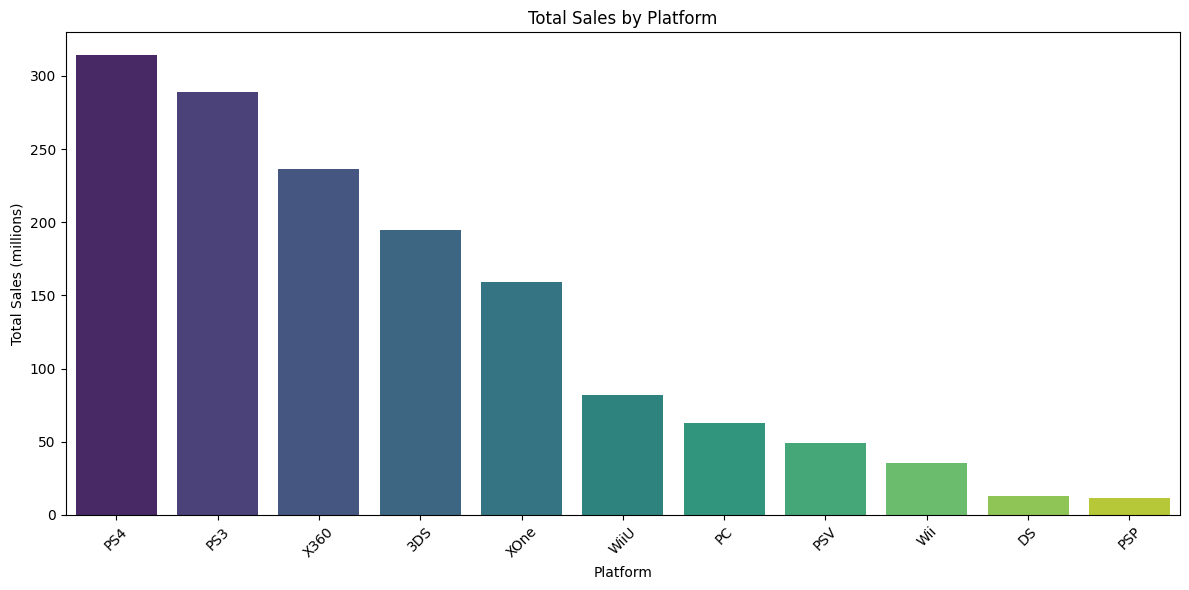

In [25]:
# Analyze platform sales trends

platform_totals = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_totals)
print()

plt.figure(figsize=(12, 6))
sns.barplot(x=platform_totals.index, y=platform_totals.values, palette='viridis')
plt.title('Total Sales by Platform')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Sort platforms by total sales
# See above...

Platforms with sales between 2012 & 2016
platform            PS3   X360     PS4    3DS     DS   XOne   WiiU    Wii     PC    PSV   PSP
year_of_release                                                                              
2012             107.36  99.74    0.00  51.36  11.01   0.00  17.56  21.71  23.22  16.19  7.69
2013             113.25  88.58   25.99  56.57   1.54  18.96  21.65   8.59  12.38  10.59  3.14
2014              47.76  34.74  100.00  43.76   0.00  54.07  22.03   3.75  13.28  11.90  0.24
2015              16.82  11.96  118.90  27.78   0.00  60.14  16.35   1.14   8.52   6.25  0.12
2016               3.60   1.52   69.25  15.14   0.00  26.15   4.60   0.18   5.25   4.25  0.00

Sum growth across all years and sort descending
platform
PS4            inf
XOne           inf
WiiU    -72.601699
3DS     -94.518158
PSV    -101.698084
PC     -113.637758
DS     -186.012716
PS3    -195.720753
X360   -224.834103
Wii    -270.588093
PSP    -301.524438
dtype: float64

Top 10 platforms b

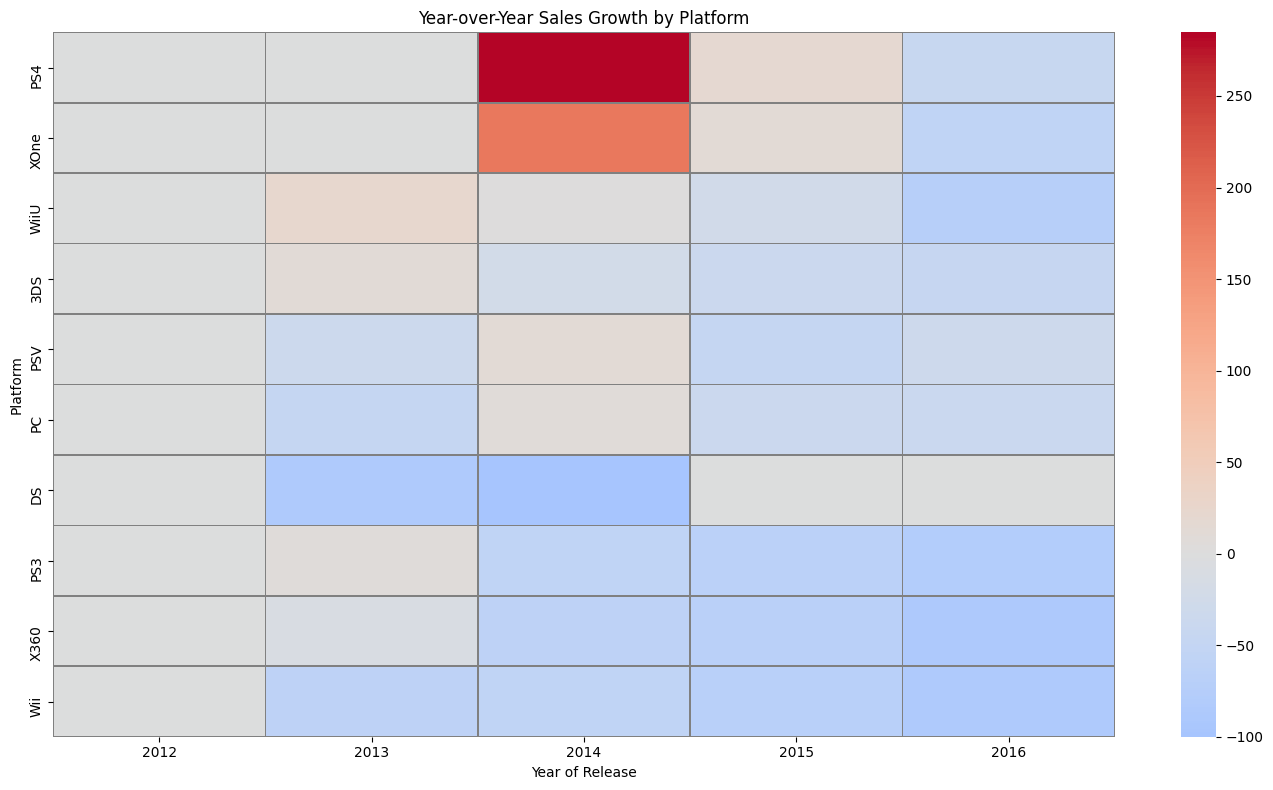

In [27]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates


platform_sales_active = platform_sales[active_2017][platform_sales.index >= 2012]
print('Platforms with sales between 2012 & 2016')
print(platform_sales_active)
print()

platform_growth = platform_sales_active.pct_change().fillna(0) * 100
# Sum growth across all years and sort descending
platform_growth_total = platform_growth.sum().sort_values(ascending=False)
print('Sum growth across all years and sort descending')
print(platform_growth_total)
print()

top_platforms = platform_growth_total.head(10).index
print('Top 10 platforms by growth')
print(top_platforms)
print()

# Filter growth data for top platforms
growth_data = platform_growth[top_platforms].fillna(0).replace([float('inf'), -float('inf')], 0)
# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(growth_data.T, cmap='coolwarm', center=0, annot=False, linewidths=0.5, linecolor='gray')
plt.title('Year-over-Year Sales Growth by Platform')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

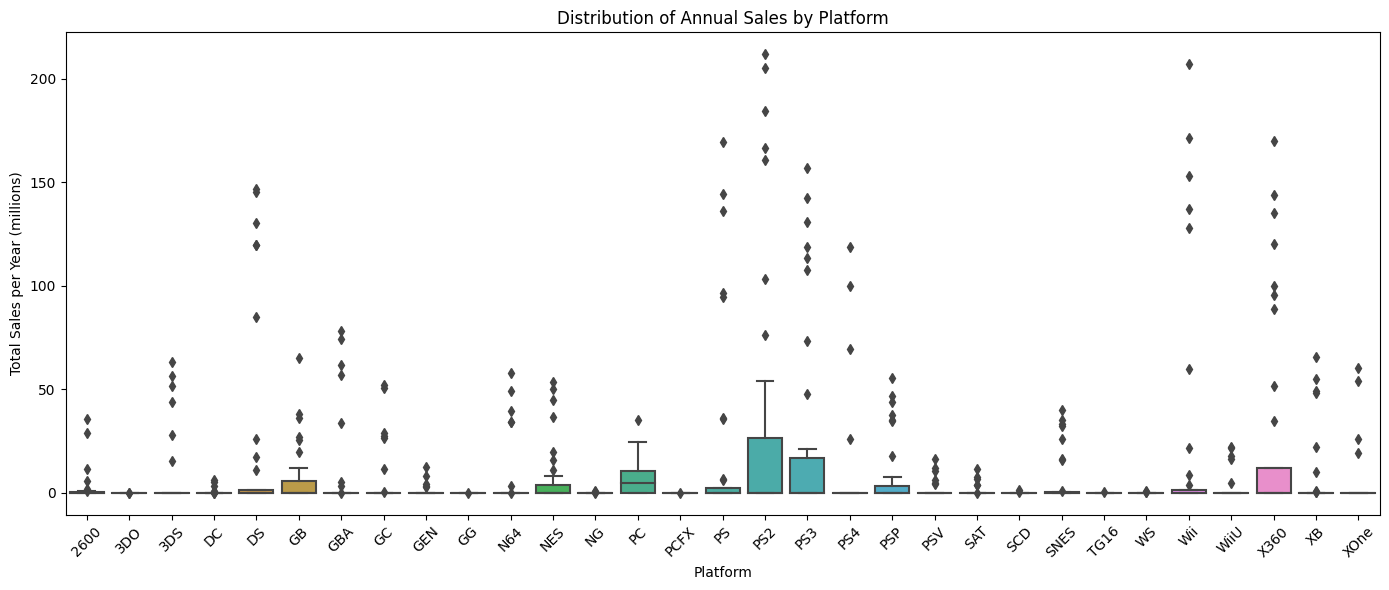

In [28]:
# Create box plot of sales by platform

# Reshape the pivot table to long format
platform_sales_long = platform_sales.reset_index().melt(id_vars='year_of_release', var_name='platform', value_name='total_sales')

# Create boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='platform', y='total_sales', data=platform_sales_long)
plt.title('Distribution of Annual Sales by Platform')
plt.ylabel('Total Sales per Year (millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sales Volume & Dominance
- Platforms like PS2, Wii, and DS show higher medians and wider interquartile ranges, indicating strong and sustained annual sales.
- Outliers above 150–200 million suggest blockbuster years, likely driven by major game releases or peak lifecycle moments.

### Volatility & Consistency
- PC and PS3 have relatively compact boxes, meaning their annual sales are more consistent.
- Platforms like SNES, GEN, and N64 show tighter distributions but lower medians—suggesting niche or shorter-lived success.

### Outliers & Exceptional Years
- Dots outside the whiskers (especially above the box) represent exceptional sales years—possibly launch years or years with hit titles.
- Wii and PS2 have multiple high outliers, reinforcing their dominance during peak periods.

### Platform Maturity & Lifecycle
- Older platforms (e.g., NES, 2600, GEN) tend to have lower medians and narrower boxes, reflecting shorter lifecycles or limited market reach.
- Newer platforms like PS4 and XOne show emerging trends—some variability, but not yet the long tail of older systems.

# Strategic Takeaways
- Platforms with high median and low spread (e.g., DS, PS2) are ideal for forecasting and investment—they’re both popular and predictable.
- Platforms with high spread and frequent outliers may be riskier but offer explosive upside in certain years.
- This visualization helps identify which platforms are stable performers vs. boom-and-bust cycles.


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Amazing findings!

                 count   mean    std  min  25%  50%   75%     max
year_of_release                                                  
1980              31.0   0.37   2.04  0.0  0.0  0.0  0.00   11.38
1981              31.0   1.15   6.41  0.0  0.0  0.0  0.00   35.68
1982              31.0   0.93   5.19  0.0  0.0  0.0  0.00   28.88
1983              31.0   0.54   2.20  0.0  0.0  0.0  0.00   10.96
1984              31.0   1.62   8.99  0.0  0.0  0.0  0.00   50.08
1985              31.0   1.74   9.60  0.0  0.0  0.0  0.00   53.44
1986              31.0   1.20   6.54  0.0  0.0  0.0  0.00   36.41
1987              31.0   0.70   3.55  0.0  0.0  0.0  0.00   19.76
1988              31.0   1.52   8.08  0.0  0.0  0.0  0.00   45.01
1989              31.0   2.37  11.70  0.0  0.0  0.0  0.00   64.97
1990              31.0   1.59   5.43  0.0  0.0  0.0  0.00   26.15
1991              31.0   1.04   3.25  0.0  0.0  0.0  0.00   16.22
1992              31.0   2.46   7.58  0.0  0.0  0.0  0.00   32.98
1993      

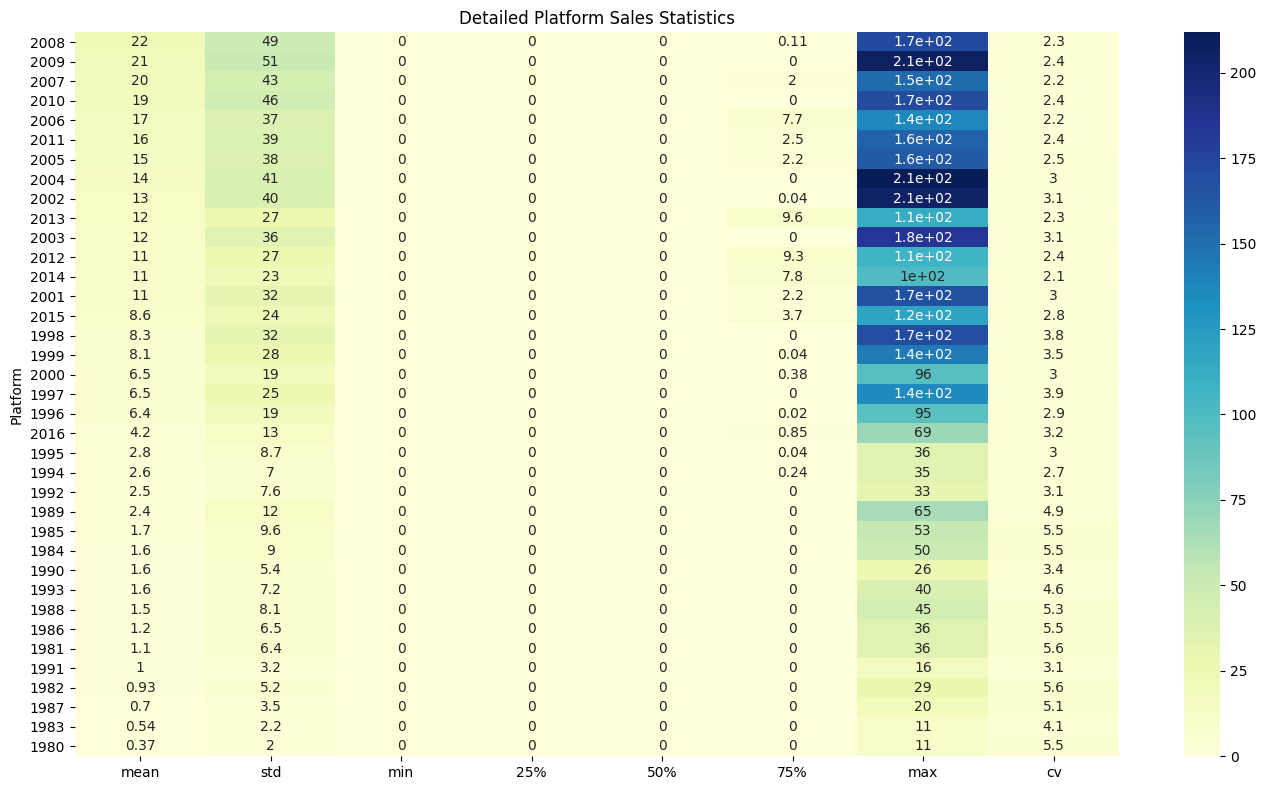

In [29]:
# Calculate detailed statistics for each platform

# Transpose so each platform is a row
platform_stats = platform_sales.T.describe().T

# Optional: round for readability
platform_stats = platform_stats.round(2)

print(platform_stats)
print()

platform_stats['cv'] = (platform_stats['std'] / platform_stats['mean']).round(2)
platform_stats_sorted = platform_stats.sort_values(by='mean', ascending=False)

plt.figure(figsize=(14, 8))
sns.heatmap(platform_stats_sorted.drop(columns='count'), annot=True, cmap='YlGnBu')
plt.title('Detailed Platform Sales Statistics')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [30]:
# Choose a popular platform based on your previous analysis

df_ps2 = df[df['platform'] == 'PS2']
print(df_ps2.head())

                             name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  critic_missing  user_missing  rating_missing  critic_score_median  critic_score_mean  total_sales
17  Grand Theft Auto: San Andreas      PS2             2004  Action      9.43      0.40      0.41        10.57          95.0         9.0      M               0             0               0                 95.0               95.0        20.81
24    Grand Theft Auto: Vice City      PS2             2002  Action      8.41      5.49      0.47         1.78          95.0         8.7      M               0             0               0                 95.0               95.0        16.15
28         Gran Turismo 3: A-Spec      PS2             2001  Racing      6.85      5.09      1.87         1.16          95.0         8.4      E               0             0               0                 95.0               95.0        14.97
38           Grand Theft Aut

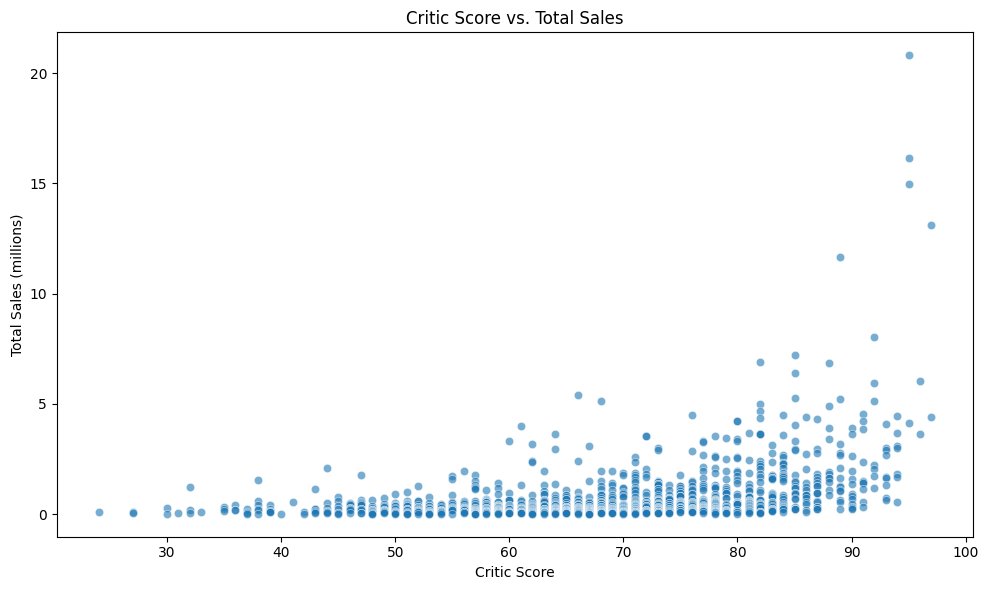

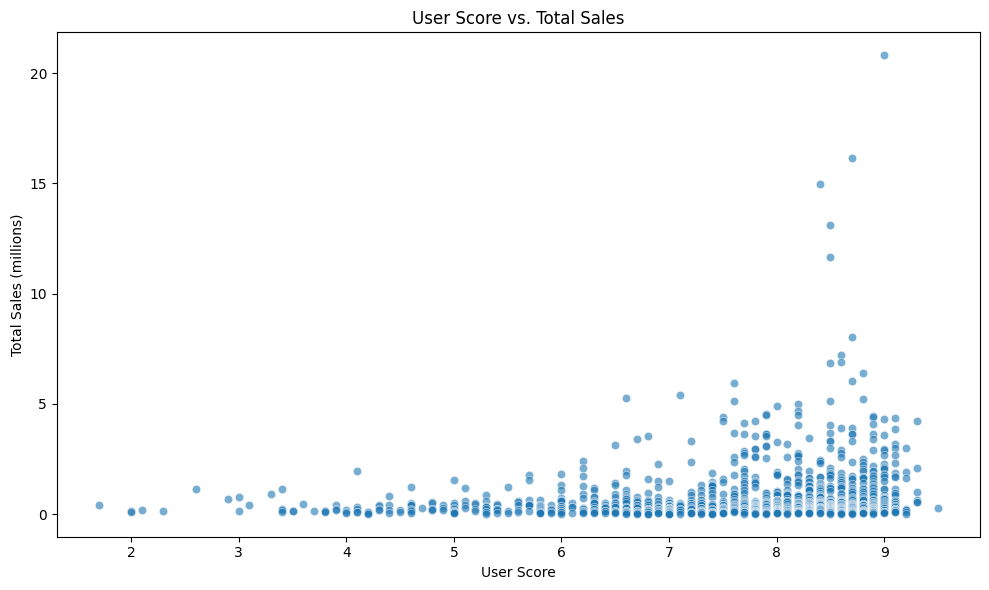

In [31]:
# Create scatter plots for both critic and user scores

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ps2, x='critic_score', y='total_sales', alpha=0.6)
plt.title('Critic Score vs. Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ps2, x='user_score', y='total_sales', alpha=0.6)
plt.title('User Score vs. Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.tight_layout()
plt.show()


In [32]:
def correlation_response(value):
    if value >= 1:
        return 'Perfect Positive'
    elif value >= 0.7 and value < 1:
        return 'Stong Positive'
    elif value >= 0.4 and value < 0.7:
        return 'Moderate Positive'
    elif value >= 0.1 and value < 0.4:
        return 'Weak Positive'
    elif value == 0:
        return 'No Correlation'
    else:
        return 'Inverse'    

In [33]:
# Critic Scores
print(df_ps2[['name', 'critic_score']])
print()

# User Scores
print(df_ps2[['name', 'user_score']])
print()

# Calculate correlations
correlation = df_ps2['critic_score'].corr(df_ps2['user_score'])
print(f"Correlation between critic score and user score: {correlation:.2f} " + correlation_response(correlation))

                                                   name  critic_score
17                        Grand Theft Auto: San Andreas          95.0
24                          Grand Theft Auto: Vice City          95.0
28                               Gran Turismo 3: A-Spec          95.0
38                                 Grand Theft Auto III          97.0
48                                       Gran Turismo 4          89.0
...                                                 ...           ...
16670      Sugar + Spice! Anoko no Suteki na Nanimokamo           NaN
16671                                    Kanokon: Esuii           NaN
16683                  Scarlett: Nichijou no Kyoukaisen           NaN
16689                                         Real Rode           NaN
16709  SCORE International Baja 1000: The Official Game           NaN

[2127 rows x 2 columns]

                                                   name  user_score
17                        Grand Theft Auto: San Andreas         9.

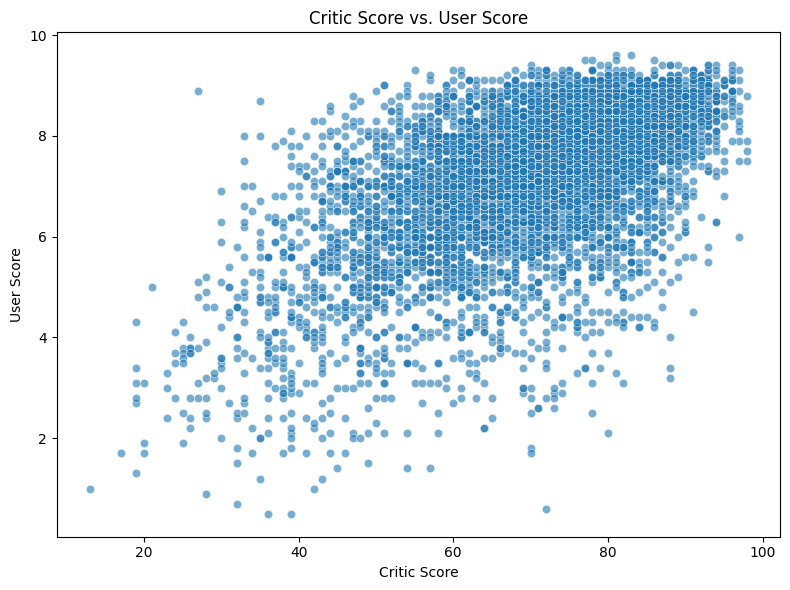

In [34]:
# Calculate the correlation between critic scores and user scores
# Drop rows with missing values to ensure valid correlation computation
# This reveals whether critics and users tend to agree on game quality
df[['critic_score', 'user_score']].dropna().corr()

# Set up the figure size for the scatter plot
plt.figure(figsize=(8, 6))

# Create a scatter plot comparing critic scores to user scores
# Each point represents a game; alpha=0.6 adds transparency to reduce overlap
sns.scatterplot(data=df, x='critic_score', y='user_score', alpha=0.6)

# Add a descriptive title to the chart
plt.title('Critic Score vs. User Score')

# Label the x-axis and y-axis for clarity
plt.xlabel('Critic Score')
plt.ylabel('User Score')

# Adjust layout to prevent clipping of labels and title
plt.tight_layout()

# Display the plot
plt.show()

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [35]:
# Find games released on multiple platforms

# Identify games released on more than one platform
# This isolates multi-platform titles for focused analysis
multi_platform_games = df.groupby('name')['platform'].nunique()

# Filter to retain only games that appear on more than one platform
multi_platform_games = multi_platform_games[multi_platform_games > 1]

# Create a DataFrame containing only multi-platform games
# Sort by name for easier inspection or merging
multi_platform_df = df[df['name'].isin(multi_platform_games.index)].sort_values(by='name')

# Further filter to include only games released in or after 2012
# Ensures relevance to recent market trends and platform transitions
multi_platform_df = multi_platform_df[multi_platform_df['year_of_release'] >= 2012]

# Display the filtered multi-platform game data
print(multi_platform_df)
print()  # Add spacing between outputs for readability

# Count the number of unique platforms each game was released on across the full dataset
# Rename the resulting Series to 'platform_count' for clarity before merging
platform_counts = df.groupby('name')['platform'].nunique().rename('platform_count')

# Merge platform count data into the filtered multi-platform DataFrame
# This adds a column showing how many platforms each game spans
multi_platform_df_cnts = multi_platform_df.merge(platform_counts, on='name')

# Display the enriched multi-platform DataFrame with platform counts
print(multi_platform_df_cnts)
print()

                                                    name platform  year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  critic_missing  user_missing  rating_missing  critic_score_median  critic_score_mean  total_sales
3862                                Frozen: Olaf's Quest       DS             2013  Platform      0.21      0.26      0.00         0.04           NaN         NaN    NaN               1             1               1                 71.0          68.994363         0.51
3358                                Frozen: Olaf's Quest      3DS             2013  Platform      0.27      0.27      0.00         0.05           NaN         NaN    NaN               1             1               1                 71.0          68.994363         0.59
9966   2 in 1 Combo Pack: Sonic Heroes / Super Monkey...     X360             2013      Misc      0.09      0.01      0.00         0.01           NaN         NaN    NaN               1            

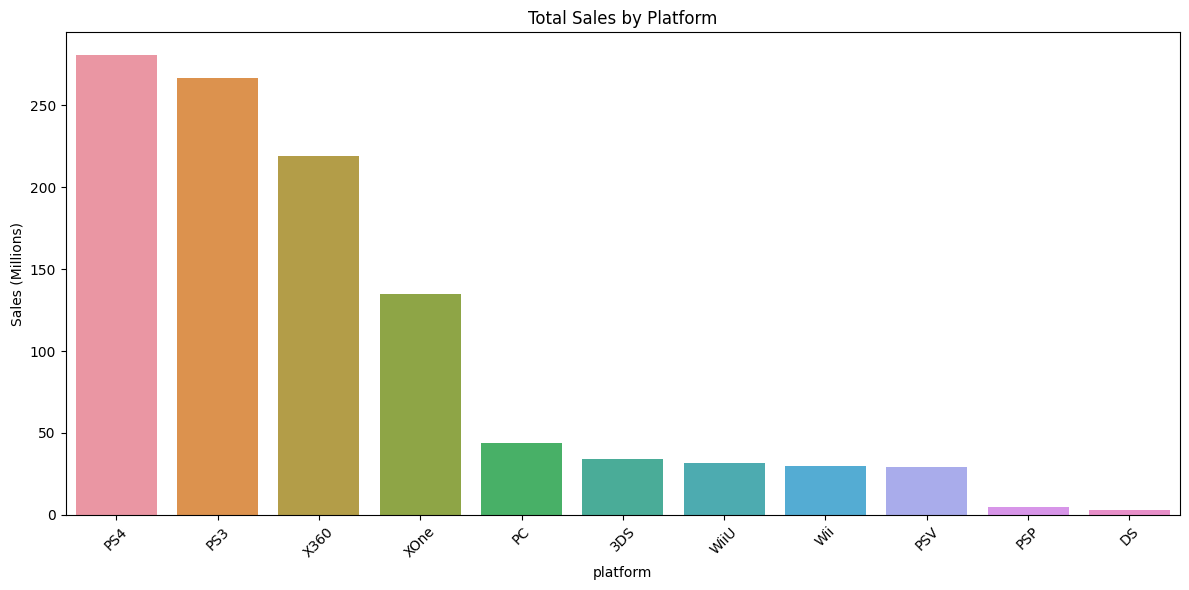

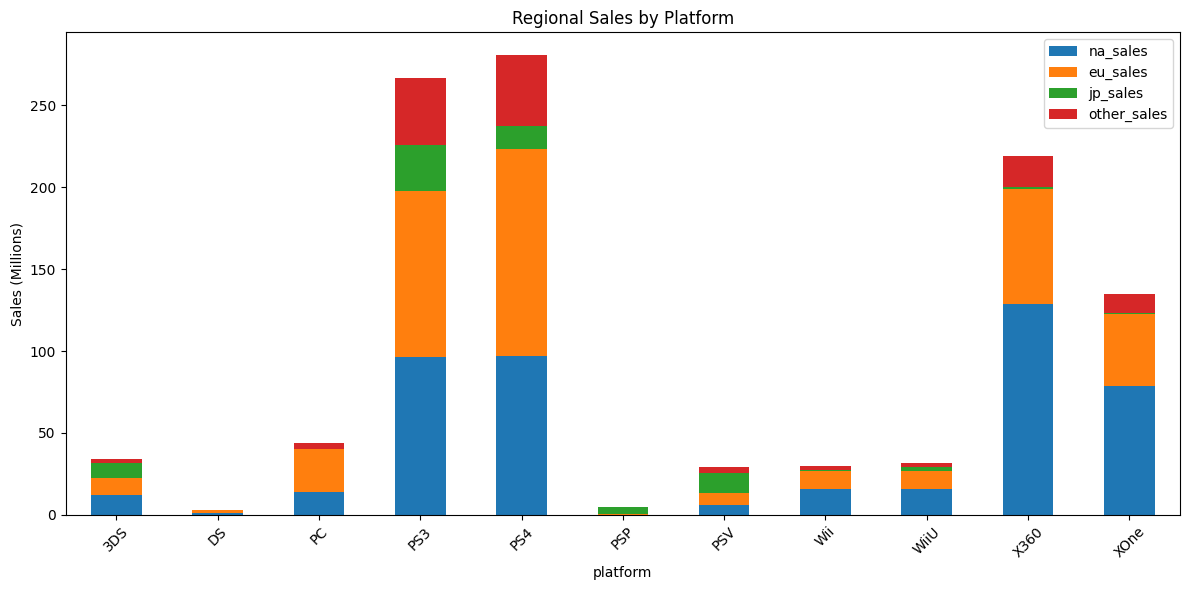

In [36]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance



# Aggregate total sales by platform across all games
# This helps identify which platforms generate the most revenue overall
platform_sales = multi_platform_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Aggregate regional sales (NA, EU, JP, Other) by platform
# Useful for understanding geographic strengths of each platform
regional_sales = multi_platform_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calculate average sales per game for each platform
# Reveals how well individual titles perform on each system, adjusting for volume
avg_sales_per_game = multi_platform_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Create a bar plot showing total sales by platform
plt.figure(figsize=(12,6))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Total Sales by Platform')  # Chart title for context
plt.ylabel('Sales (Millions)')        # Y-axis label
plt.xticks(rotation=45)               # Rotate x-axis labels for readability
plt.tight_layout()                    # Adjust layout to prevent clipping
plt.show()                            # Display the plot

# Create a stacked bar chart showing regional sales breakdown by platform
regional_sales.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Regional Sales by Platform')  # Chart title for context
plt.ylabel('Sales (Millions)')           # Y-axis label
plt.xticks(rotation=45)                  # Rotate x-axis labels for readability
plt.tight_layout()                       # Adjust layout to prevent clipping
plt.show()                               # Display the plot

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [37]:
# Analyze genre performance

# Identify games that are associated with more than one genre
# This helps isolate multi-genre titles for focused analysis
multi_genre_games = df.groupby('name')['genre'].nunique()

# Filter to retain only games with more than one genre
multi_genre_games = multi_genre_games[multi_genre_games > 1]

# Create a new DataFrame containing only multi-genre games
# Sort by name for easier inspection or merging
multi_genre_df = df[df['name'].isin(multi_genre_games.index)].sort_values(by='name')

# Further filter to include only games released in or after 2012
# This ensures relevance to recent market trends
multi_genre_df = multi_genre_df[multi_genre_df['year_of_release'] >= 2012]

# Display the filtered multi-genre game data
print(multi_genre_df)
print()  # Add spacing between outputs for readability

# Count the number of unique genres per game across the full dataset
# Rename the resulting Series for clarity before merging
genre_counts = df.groupby('name')['genre'].nunique().rename('genre_counts')

# Merge genre count data into the filtered multi-genre DataFrame
# This adds a column showing how many genres each game spans
multi_genre_df_cnts = multi_genre_df.merge(genre_counts, on='name')

# Display the enriched multi-genre DataFrame with genre counts
print(multi_genre_df_cnts)
print()  # Add spacing between outputs for readability

                                       name platform  year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  critic_missing  user_missing  rating_missing  critic_score_median  critic_score_mean  total_sales
13549                            Battlezone      PS4             2016     Action      0.02      0.02      0.00         0.01          66.0         7.0      T               0             0               0                 66.0          66.000000         0.05
8662                               Culdcept      3DS             2012       Misc      0.00      0.00      0.16         0.00           NaN         NaN    NaN               1             1               1                 71.0          68.994363         0.16
14935     Little Busters! Converted Edition      PSV             2012     Action      0.00      0.00      0.03         0.00           NaN         NaN    NaN               1             1               1                 71.0         

In [38]:
# Sort genres by total sales

multi_genre_sales_df = (
    multi_genre_df
    .groupby('genre', as_index=False)['total_sales']
    .sum()
    .sort_values(by='total_sales', ascending=False)
)
print(multi_genre_sales_df)

       genre  total_sales
3    Shooter         0.33
2       Misc         0.16
0     Action         0.14
1  Adventure         0.02


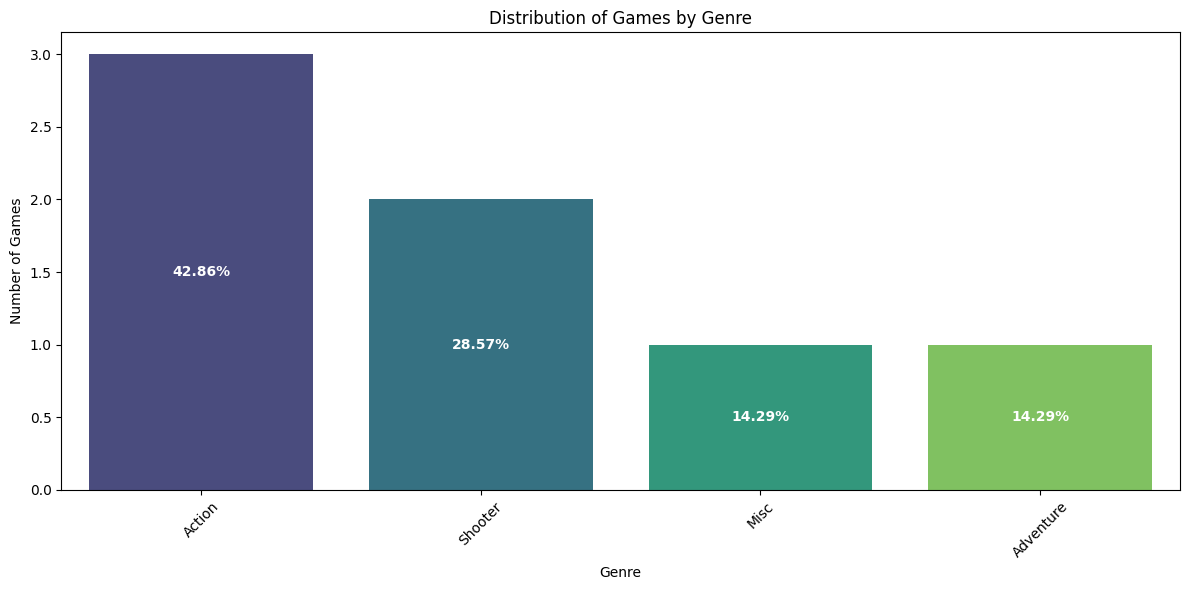

In [39]:
# Visualize genre distribution

# Count number of games per genre
genre_counts = multi_genre_df['genre'].value_counts()
genre_percent = (genre_counts / genre_counts.sum() * 100).round(2)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Games by Genre')
plt.ylabel('Number of Games')
plt.xlabel('Genre')
plt.xticks(rotation=45)

# Add percentage labels inside bars
for i, (count, percent) in enumerate(zip(genre_counts.values, genre_percent.values)):
    ax.text(i, count * 0.5, f'{percent}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

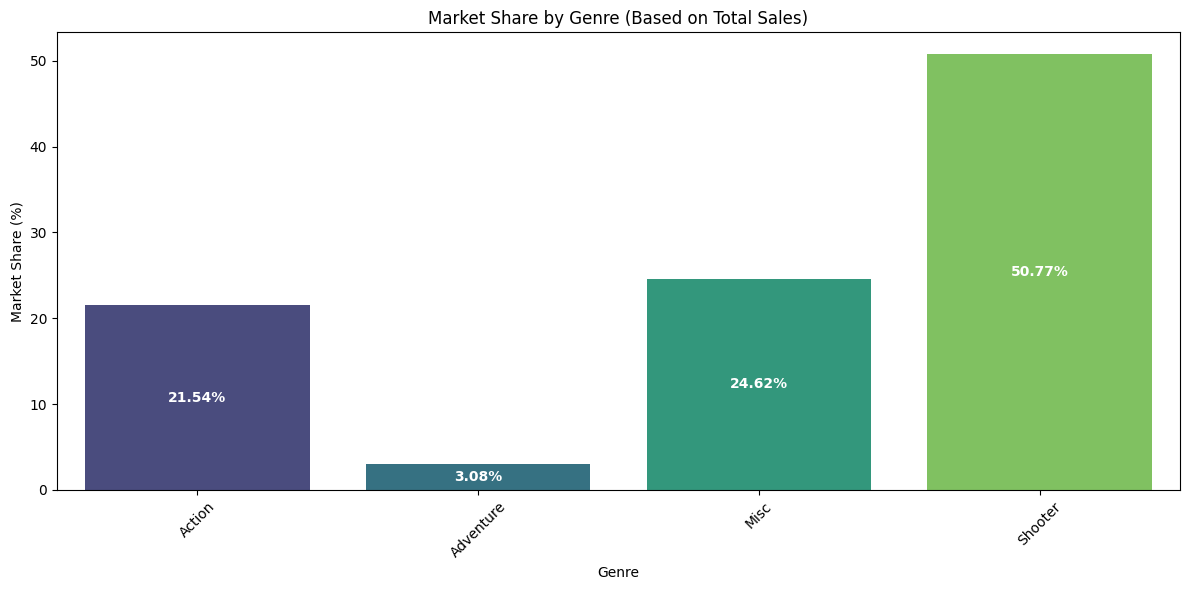

In [40]:
# Calculate market share for each genre

# Calculate total sales per genre
genre_sales = multi_genre_df.groupby('genre')['total_sales'].sum()

# Calculate market share
genre_market_share = (genre_sales / genre_sales.sum() * 100).round(2)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x=genre_market_share.index, y=genre_market_share.values, palette='viridis')
plt.title('Market Share by Genre (Based on Total Sales)')
plt.ylabel('Market Share (%)')
plt.xlabel('Genre')
plt.xticks(rotation=45)

# Add percentage labels inside bars
for i, percent in enumerate(genre_market_share.values):
    ax.text(i, percent * 0.5, f'{percent}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [41]:
# Aggregate total sales by genre across all years
# This helps identify which genres perform best overall
genre_performance = (
    df_relevant
    .groupby('genre', as_index=False)['total_sales']  # Group by genre and sum total sales
    .sum()
    .sort_values(by='total_sales', ascending=False)   # Sort genres by total sales in descending order
)

# Print the genre performance summary
print(genre_performance)
print()  # Add spacing between outputs for readability

# Aggregate total sales by genre and year of release
# This enables trend analysis over time for each genre
genre_yearly_sales = (
    df_relevant
    .groupby(['genre', 'year_of_release'], as_index=False)['total_sales']  # Group by genre and year
    .sum()
)

# Print the yearly sales breakdown by genre
print(genre_yearly_sales)

           genre  total_sales
0         Action       441.12
8        Shooter       304.73
7   Role-Playing       192.80
10        Sports       181.07
3           Misc        85.04
4       Platform        61.00
6         Racing        53.50
2       Fighting        44.49
9     Simulation        35.12
1      Adventure        29.43
11      Strategy        13.34
5         Puzzle         4.89

           genre  year_of_release  total_sales
0         Action             2012       119.25
1         Action             2013       122.51
2         Action             2014        97.23
3         Action             2015        72.02
4         Action             2016        30.11
5      Adventure             2012         5.79
6      Adventure             2013         6.09
7      Adventure             2014         5.57
8      Adventure             2015         8.16
9      Adventure             2016         3.82
10      Fighting             2012         9.18
11      Fighting             2013         7.0

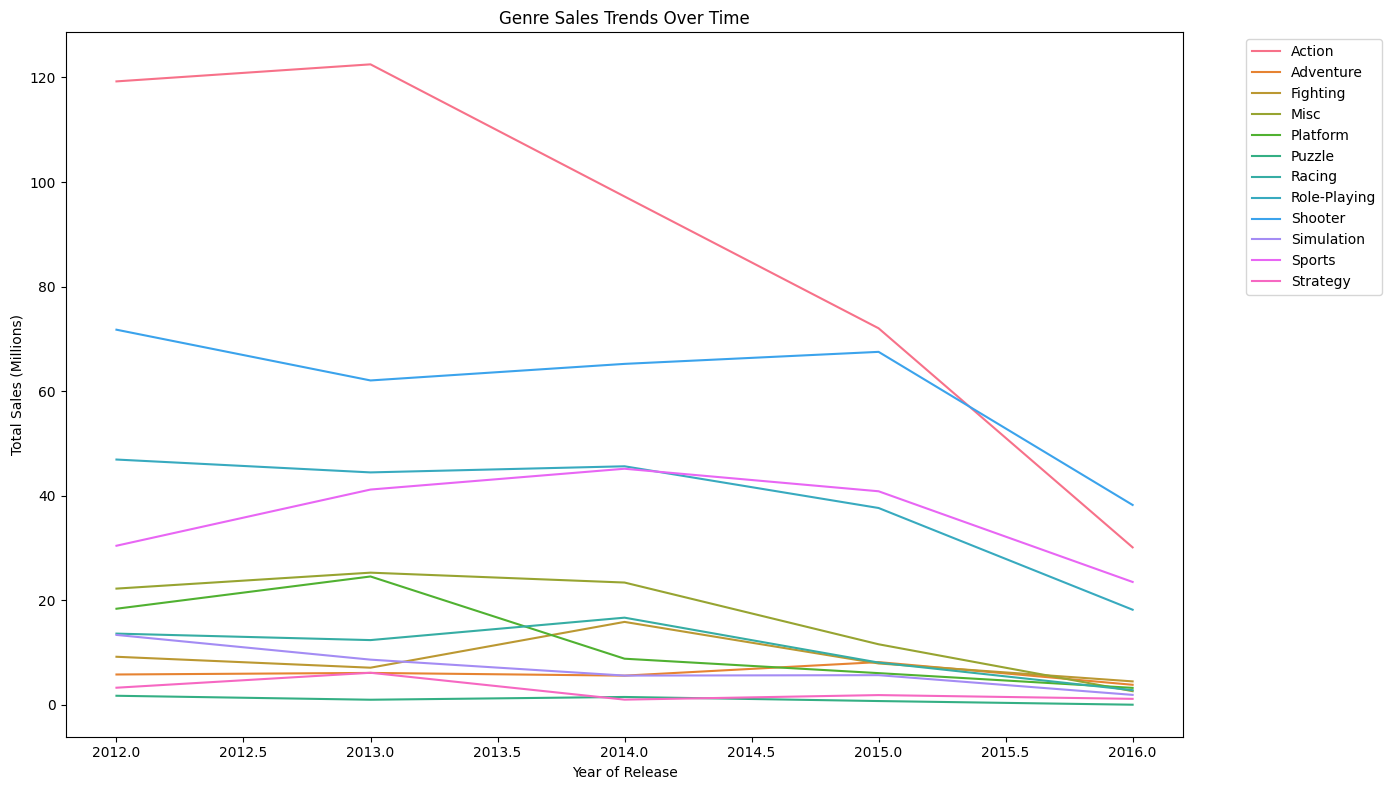

In [42]:
# Create a new figure with a specified size to ensure readability
plt.figure(figsize=(14,8))

# Generate a line plot showing total sales over time for each genre
# 'hue' differentiates genres by color, allowing trend comparison across categories
sns.lineplot(data=genre_yearly_sales, x='year_of_release', y='total_sales', hue='genre')

# Add a descriptive title to the chart
plt.title('Genre Sales Trends Over Time')

# Label the y-axis to indicate the metric being measured
plt.ylabel('Total Sales (Millions)')

# Label the x-axis to show the time dimension
plt.xlabel('Year of Release')

# Position the legend outside the plot area to avoid overlap with data lines
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels and legend
plt.tight_layout()

# Render the plot
plt.show()

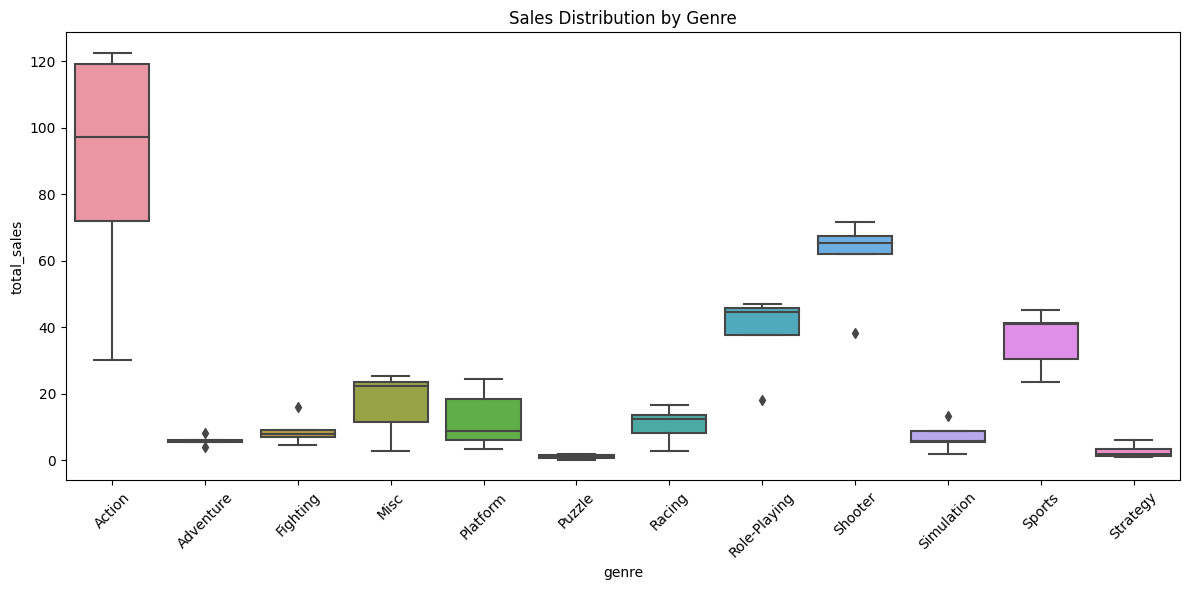

In [43]:
# Calculate year-over-year percentage change in total sales for each genre
# This helps identify growth or decline trends within each genre over time
genre_yearly_sales['sales_change'] = genre_yearly_sales.groupby('genre')['total_sales'].pct_change()

# Set up the figure size for the boxplot
plt.figure(figsize=(12,6))

# Create a boxplot to visualize the distribution of total sales across genres
# This shows median, quartiles, and outliers — useful for comparing genre performance
sns.boxplot(data=genre_yearly_sales, x='genre', y='total_sales')

# Add a title to the plot for context
plt.title('Sales Distribution by Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of labels and title
plt.tight_layout()

# Display the plot
plt.show()

### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

## Key Trends and Strategic Insights

# Stable but Low-Volume Genres
- Puzzle, Strategy, Simulation maintain flat, low sales throughout the period.
- These genres show little volatility, suggesting niche appeal or limited mainstream traction.
- Strategic takeaway: Best suited for targeted audiences or mobile-first development, not core revenue drivers.

# Action Genre: Early Peak, Gradual Decline
- Action games dominate the chart, peaking around 2013 with the highest sales across all genres.
- Post-2013, there's a steady decline, suggesting market saturation or shifting consumer interest.
- Strategic takeaway: Action remains a high-volume genre but may require innovation or IP refresh to sustain momentum.

# Shooter and Sports: Strong but Slipping
- Both genres show significant sales early on, with Shooter peaking in 2013 and Sports maintaining strength through 2014.
- However, both exhibit downward trends post-2013, possibly due to franchise fatigue or platform transitions.
- Strategic takeaway: These genres are still reliable but may benefit from new mechanics or cross-platform strategies.

# Mid-Tier Genres with Opportunity
- Role-playing, Adventure, Platform genres show modest but stable performance.
- No dramatic spikes, but also no sharp declines — indicating consistent engagement.
- Strategic takeaway: These genres may be ripe for growth through storytelling innovation or hybrid mechanics.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
A very well-conducted analysis!

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

                                name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  critic_missing  user_missing  rating_missing  critic_score_median  critic_score_mean  total_sales
16                Grand Theft Auto V      PS3             2013        Action      7.02      9.09      0.98         3.96          97.0         8.2      M               0             0               0                 97.0          97.000000        21.05
23                Grand Theft Auto V     X360             2013        Action      9.66      5.14      0.06         1.41          97.0         8.1      M               0             0               0                 97.0          97.000000        16.27
31         Call of Duty: Black Ops 3      PS4             2015       Shooter      6.03      5.86      0.36         2.38           NaN         NaN    NaN               1             1               1                 71.0          68.994363      

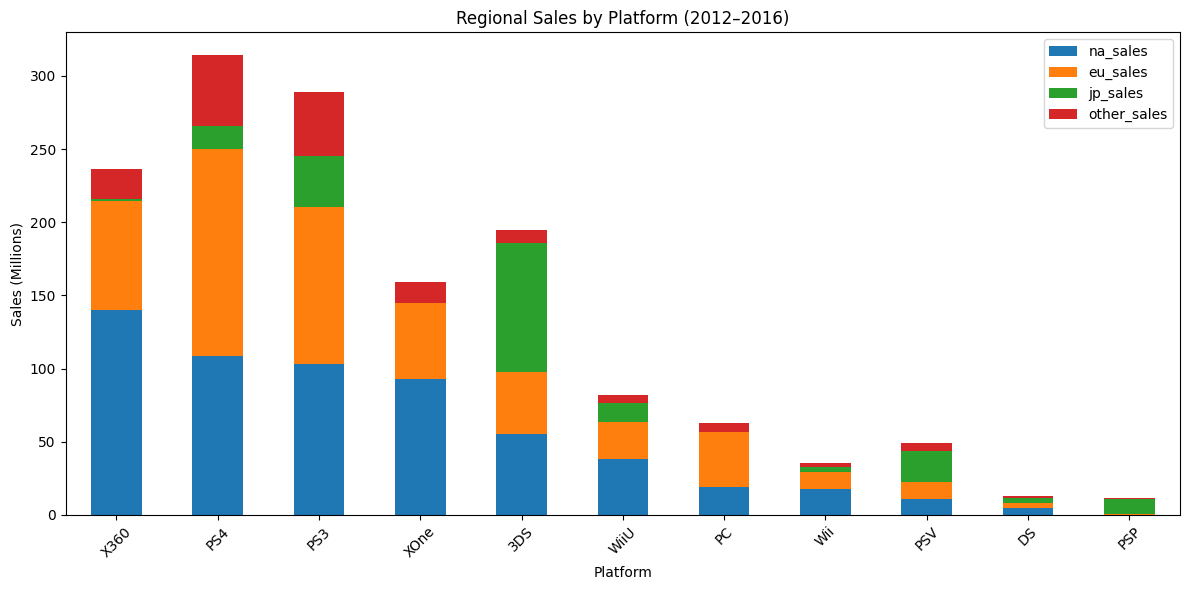

Share by region
          na_sales  eu_sales  jp_sales  other_sales
platform                                           
X360          0.59      0.32      0.01         0.09
PS4           0.35      0.45      0.05         0.15
PS3           0.36      0.37      0.12         0.15
XOne          0.58      0.32      0.00         0.09
3DS           0.28      0.22      0.45         0.05
WiiU          0.46      0.31      0.16         0.07
PC            0.31      0.60      0.00         0.09
Wii           0.49      0.34      0.10         0.07
PSV           0.22      0.23      0.43         0.12
DS            0.37      0.28      0.30         0.06
PSP           0.01      0.04      0.94         0.02

Average Sales by region
          na_sales  eu_sales  jp_sales  other_sales
platform                                           
3DS           0.14      0.11      0.22         0.02
DS            0.15      0.11      0.12         0.02
PC            0.08      0.15      0.00         0.02
PS3           0.21     

In [44]:
# Function to analyze platform performance by region

# Display the filtered dataset for inspection
# This dataframe contains game data from 2012–2016 across platforms and regions
print(df_relevant)
print()  # Add spacing between outputs for readability

# Aggregate total regional sales by platform
# This shows how much each platform sold in NA, EU, JP, and Other regions
regional_sales = (
    df_relevant
    .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .sum()
    .sort_values(by='na_sales', ascending=False)  # Optional: sort by North American dominance
)

# Create a stacked bar chart to visualize regional sales distribution per platform
regional_sales.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Regional Sales by Platform (2012–2016)')  # Chart title for context
plt.ylabel('Sales (Millions)')                       # Y-axis label
plt.xlabel('Platform')                               # X-axis label
plt.xticks(rotation=45)                              # Rotate x-axis labels for readability
plt.tight_layout()                                   # Adjust layout to prevent clipping
plt.show()                                           # Display the plot

# Calculate the percentage share of each region within each platform's total sales
# This reveals geographic strengths and market orientation per platform
regional_share = regional_sales.div(regional_sales.sum(axis=1), axis=0).round(2)

# Display the regional share breakdown
print('Share by region')
print(regional_share)
print()

# Calculate average sales per game by region for each platform
# This normalizes performance and highlights per-title efficiency
avg_sales = (
    df_relevant
    .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .mean()
    .round(2)
)

# Display the average regional sales per game
print('Average Sales by region')
print(avg_sales)

### Analyze each region

## North America (na_sales – Blue)
# Observations:
- PS4, Xbox 360, and PS3 dominate in North America.
- Xbox One also performs well, reinforcing Microsoft's strong foothold in this region.
- Nintendo platforms (3DS, WiiU, Wii) show moderate sales, with 3DS leading among them.
Strategic Insight:
North America favors platforms with strong multiplayer ecosystems and franchise continuity. Microsoft and Sony both benefit from brand loyalty and annualized releases (e.g., Call of Duty, Madden). This region is ideal for launching blockbuster titles and console-first exclusives.

## Europe (eu_sales – Orange)
# Observations:
- PS4 leads, followed by PS3 and Xbox 360.
- Xbox One lags slightly behind its predecessor.
- Nintendo platforms show modest performance, with 3DS again outperforming WiiU and Wii.
Strategic Insight:
Europe mirrors North America in platform preference but leans slightly more toward Sony. Localization, sports titles (e.g., FIFA), and RPGs tend to perform well here. Sony’s dominance suggests strong brand equity and distribution across EU markets.

## Japan (jp_sales – Green)
# Observations:
- 3DS is the clear leader, far surpassing all other platforms.
- PSV and PS4 follow, with WiiU and PS3 contributing modestly.
- Xbox platforms (360, One) show minimal traction.
Strategic Insight:
Japan favors portable and regionally tailored platforms. Nintendo’s dominance reflects cultural preferences for handheld gaming and family-friendly content. Microsoft’s minimal presence suggests limited ROI unless paired with exclusive Japanese-developed titles.

## Other Regions (other_sales – Red)
# Observations:
- PS4 again leads, followed by PS3, Xbox 360, and Xbox One.
- 3DS and PC show moderate performance.
- Wii, WiiU, and PSV trail behind.
Strategic Insight:
“Other” regions (likely including Latin America, Australia, and parts of Asia) show a balanced mix, with Sony and Microsoft leading. These markets may be more price-sensitive, so mid-tier titles and legacy platform support could be key.


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Amazing!

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [45]:
# Create a comparative platform analysis


# Calculate total sales per platform across all games
# This reveals which platforms generated the most revenue overall
platform_sales = (
    df_relevant
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)
print("Total Sales by Platform:")
print(platform_sales)
print()  # Add spacing between outputs for readability

# Aggregate regional sales (NA, EU, JP, Other) per platform
# Useful for identifying geographic strengths and market distribution
regional_sales = (
    df_relevant
    .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .sum()
)
print("Regional Sales by Platform:")
print(regional_sales)
print()

# Calculate average sales per game for each platform
# This normalizes performance and highlights per-title efficiency
avg_sales = (
    df_relevant
    .groupby('platform')['total_sales']
    .mean()
    .sort_values(ascending=False)
)
print("Average Sales per Game by Platform:")
print(avg_sales)
print()

# Compute average critic and user scores per platform
# Indicates perceived quality and reception of games on each system
score_summary = (
    df_relevant
    .groupby('platform')[['critic_score', 'user_score']]
    .mean()
    .round(2)
)
print("Average Critic and User Scores by Platform:")
print(score_summary)
print()

# Count the number of unique genres represented on each platform
# Measures content diversity and catalog breadth
genre_diversity = df_relevant.groupby('platform')['genre'].nunique().sort_values(ascending=False)

# Count the number of unique ESRB ratings per platform
# Indicates audience targeting and age-range diversity
rating_diversity = df_relevant.groupby('platform')['rating'].nunique().sort_values(ascending=False)

print("Genre Diversity by Platform:")
print(genre_diversity)
print("\nRating Diversity by Platform:")
print(rating_diversity)
print()

# Summarize missing data counts for critic score, user score, and rating per platform
# Helps assess data completeness and reliability for each system
missing_summary = (
    df_relevant
    .groupby('platform')[['critic_missing', 'user_missing', 'rating_missing']]
    .sum()
)
print("Missing Data Counts by Platform:")
print(missing_summary)
print()

Total Sales by Platform:
platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

Regional Sales by Platform:
          na_sales  eu_sales  jp_sales  other_sales
platform                                           
3DS          55.31     42.64     87.79         8.87
DS            4.59      3.53      3.72         0.71
PC           19.12     37.76      0.00         5.77
PS3         103.38    106.86     35.29        43.26
PS4         108.74    141.09     15.96        48.35
PSP           0.13      0.42     10.47         0.17
PSV          10.98     11.36     21.04         5.80
Wii          17.45     11.92      3.39         2.61
WiiU         38.10     25.13     13.01         5.95
X360        140.05     74.52      1.57        20.40
XOne         93.12     51.59      0.34        14.27

Average Sales per Game by Platform:
platform
X360    0.810068

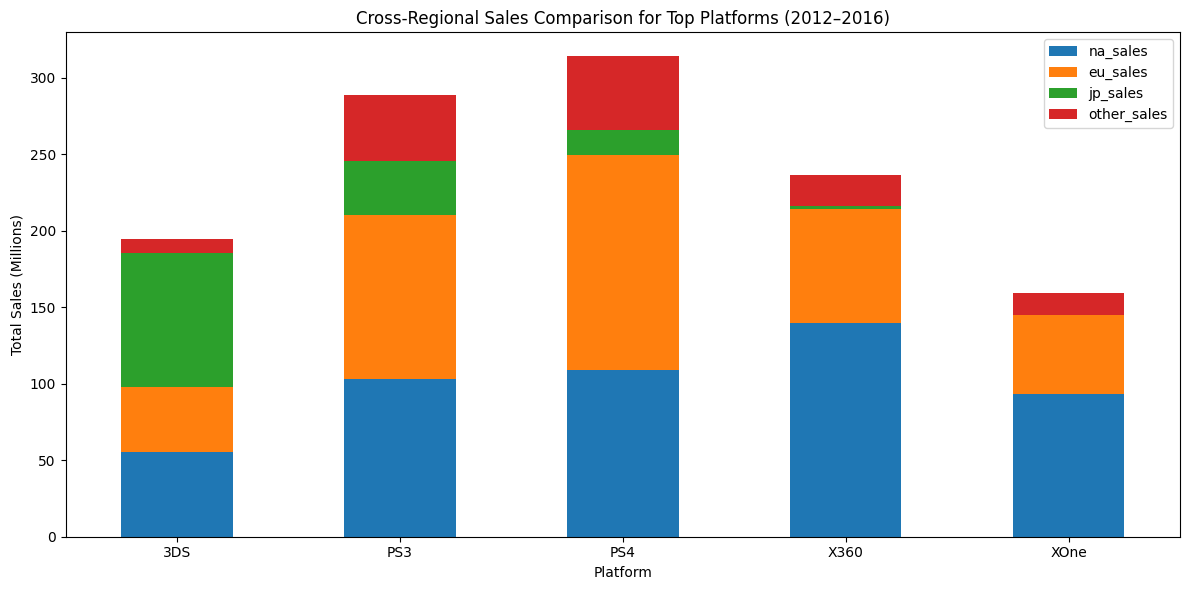

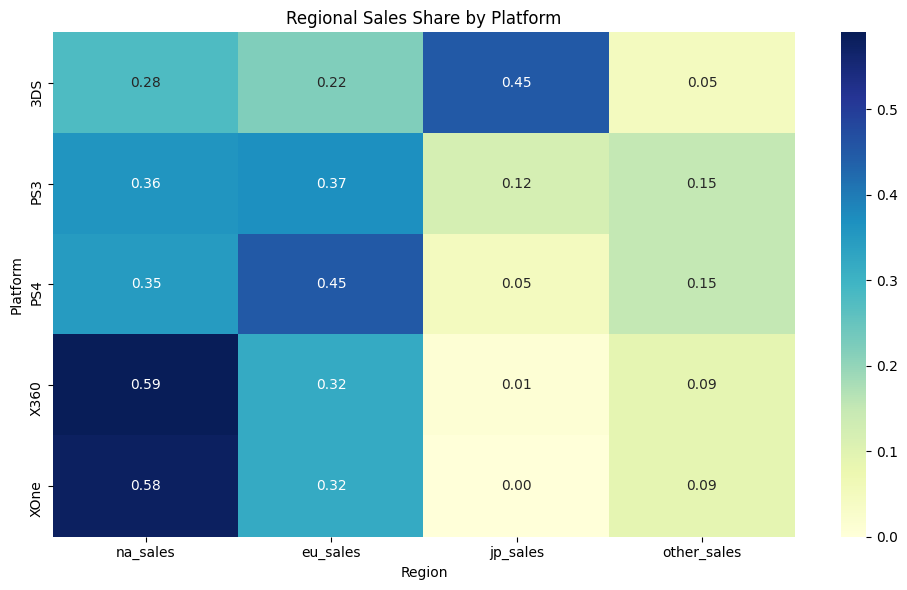

In [46]:
# Visualize cross-regional comparison for top platforms

# Select the top 5 platforms based on total global sales
# This narrows the analysis to the most commercially successful systems
top_platforms = (
    df_relevant.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the dataset to include only games from the top 5 platforms
df_top = df_relevant[df_relevant['platform'].isin(top_platforms)]

# Aggregate regional sales (NA, EU, JP, Other) for each top platform
# This provides a breakdown of where each platform performs best
regional_comparison = (
    df_top.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .sum()
    .reset_index()
)

# Normalize regional sales to calculate percentage share per platform
# This reveals geographic orientation and market balance for each system
regional_share = regional_comparison.set_index('platform')
regional_share = regional_share.div(regional_share.sum(axis=1), axis=0).round(2)

# Create a stacked bar chart to visualize total regional sales per platform
regional_comparison.set_index('platform').plot(
    kind='bar', stacked=True, figsize=(12,6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Color-coded by region: NA, EU, JP, Other
)
plt.title('Cross-Regional Sales Comparison for Top Platforms (2012–2016)')  # Chart title
plt.ylabel('Total Sales (Millions)')  # Y-axis label
plt.xlabel('Platform')  # X-axis label
plt.xticks(rotation=0)  # Keep platform labels horizontal for readability
plt.tight_layout()  # Prevent clipping of labels and title
plt.show()  # Display the plot

# Create a heatmap to visualize regional sales share per platform
# This highlights relative strength and specialization across regions
plt.figure(figsize=(10,6))
sns.heatmap(regional_share, annot=True, cmap='YlGnBu', fmt='.2f')  # Annotate with percentages
plt.title('Regional Sales Share by Platform')  # Chart title
plt.ylabel('Platform')  # Y-axis label
plt.xlabel('Region')  # X-axis label
plt.tight_layout()  # Prevent clipping
plt.show()  # Display the heatmap

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [47]:
# Function to analyze genre performance by region

def analyze_genre_by_region(df, visualize=True, top_n=None):
    """
    Analyze genre performance across regions (NA, EU, JP, Other).
    
    Parameters:
    - df: DataFrame containing columns ['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    - visualize: If True, displays a stacked bar chart
    - top_n: If set, limits output to top N genres by total sales
    
    Returns:
    - genre_sales: DataFrame with total regional sales per genre
    - genre_share: DataFrame with percentage share of each region per genre
    """
    
    # Aggregate total sales by genre and region
    genre_sales = (
        df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
        .sum()
        .sort_values(by='na_sales', ascending=False)
    )
    
    # Optionally filter to top N genres by total sales
    if top_n:
        total_sales = genre_sales.sum(axis=1)
        top_genres = total_sales.sort_values(ascending=False).head(top_n).index
        genre_sales = genre_sales.loc[top_genres]
    
    # Calculate regional share per genre
    genre_share = genre_sales.div(genre_sales.sum(axis=1), axis=0).round(2)
    
    # Visualization: Stacked bar chart
    if visualize:
        genre_sales.plot(kind='bar', stacked=True, figsize=(12,6),
                         color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])  # NA, EU, JP, Other
        plt.title('Genre Performance by Region')
        plt.ylabel('Total Sales (Millions)')
        plt.xlabel('Genre')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    return genre_sales, genre_share

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

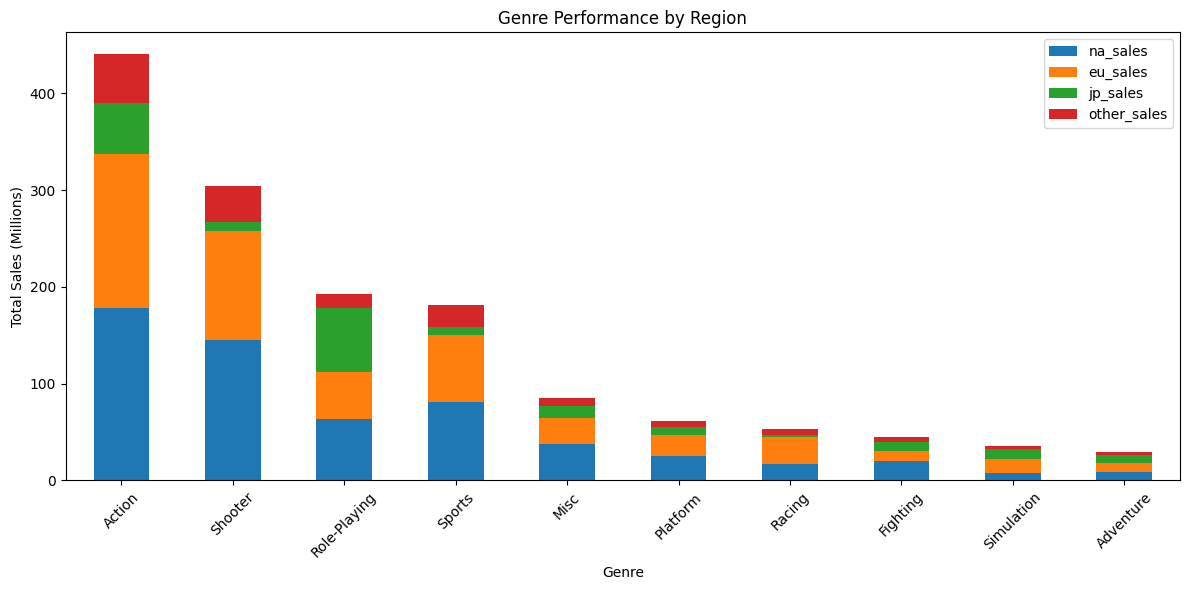

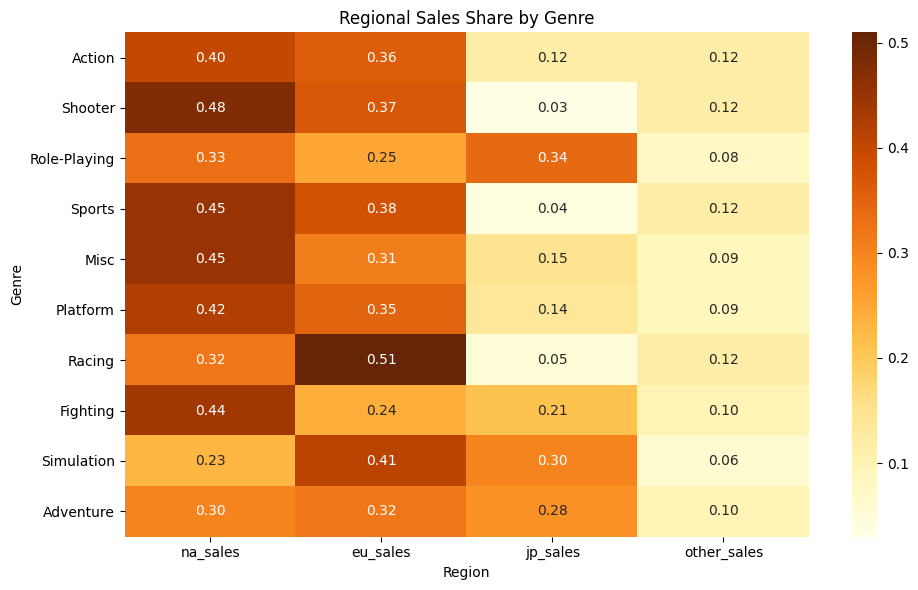

In [48]:
# Create a comparative genre analysis

# Run the genre analysis with visualization and limit to top 10 genres
genre_sales, genre_share = analyze_genre_by_region(df_relevant, visualize=True, top_n=10)

plt.figure(figsize=(10,6))
sns.heatmap(genre_share, annot=True, cmap='YlOrBr', fmt='.2f')
plt.title('Regional Sales Share by Genre')
plt.ylabel('Genre')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [49]:
# Function to analyze ESRB rating impact


def analyze_rating_impact(df, visualize=True):
    """
    Analyze the impact of ESRB ratings on sales, game quality, and distribution.
    
    Parameters:
    - df: DataFrame containing columns ['rating', 'total_sales', 'critic_score', 'user_score']
    - visualize: If True, displays bar charts for sales and score comparisons
    
    Returns:
    - rating_summary: DataFrame with total sales, average scores, and game count per rating
    """
    
    # Group by ESRB rating and calculate key metrics
    rating_summary = (
        df.groupby('rating')
        .agg(
            total_sales=('total_sales', 'sum'),
            avg_critic_score=('critic_score', 'mean'),
            avg_user_score=('user_score', 'mean'),
            game_count=('name', 'count')
        )
        .round(2)
        .sort_values(by='total_sales', ascending=False)
    )
    
    # Visualization: Total Sales by Rating
    if visualize:
        plt.figure(figsize=(10,5))
        sns.barplot(x=rating_summary.index, y=rating_summary['total_sales'], palette='viridis')
        plt.title('Total Sales by ESRB Rating')
        plt.ylabel('Sales (Millions)')
        plt.xlabel('ESRB Rating')
        plt.tight_layout()
        plt.show()
        
        # Visualization: Average Scores by Rating
        rating_summary[['avg_critic_score', 'avg_user_score']].plot(
            kind='bar', figsize=(10,5), rot=0, colormap='coolwarm'
        )
        plt.title('Average Critic and User Scores by ESRB Rating')
        plt.ylabel('Score')
        plt.xlabel('ESRB Rating')
        plt.tight_layout()
        plt.show()
    
    return rating_summary

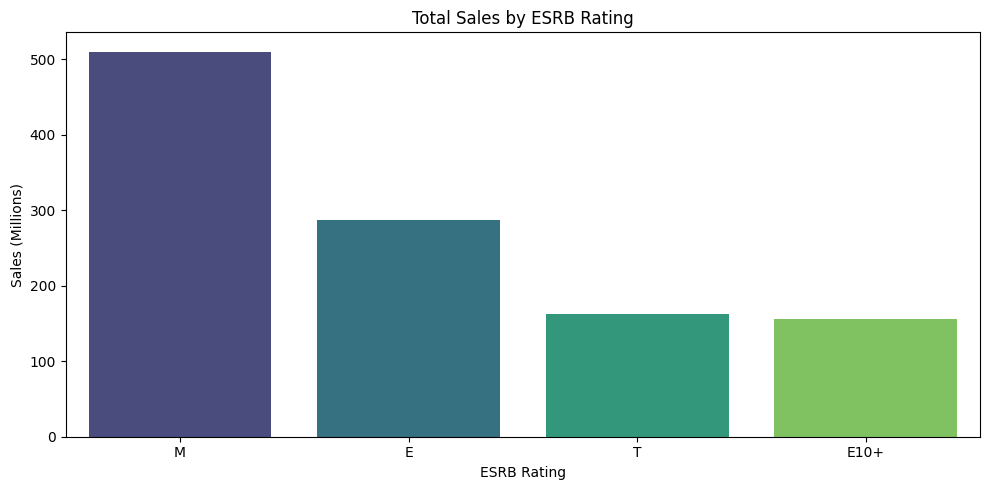

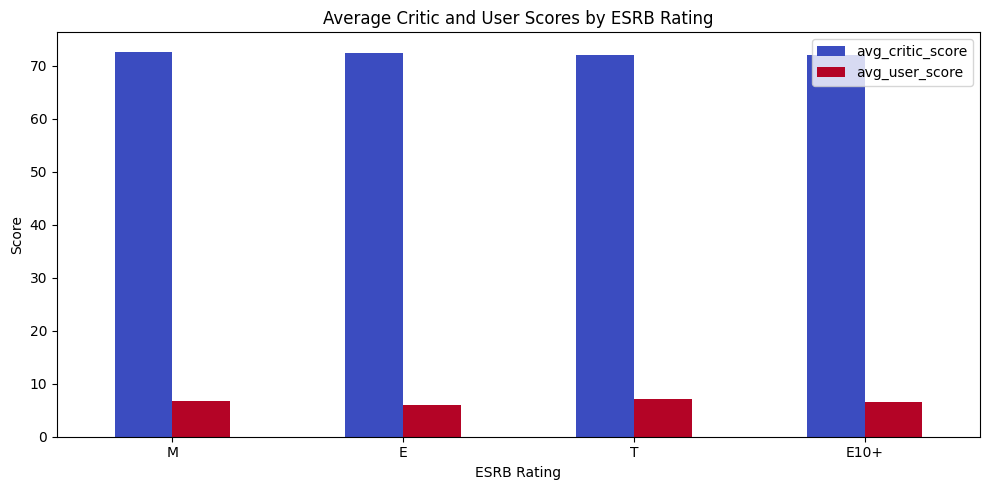

ESRB Rating Impact Summary:
        total_sales  avg_critic_score  avg_user_score  game_count
rating                                                           
M            510.11             72.71            6.74         498
E            287.17             72.51            5.97         395
T            162.94             72.12            7.03         412
E10+         155.49             72.01            6.62         306


In [50]:
# Analyze ESRB impact for each region

rating_impact = analyze_rating_impact(df_relevant, visualize=True)
print("ESRB Rating Impact Summary:")
print(rating_impact)


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
The charts presented in each section clearly show where the market is headed.

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


# Hypothesis Test 1: Xbox One vs PC — Average User Ratings
## Objective:
Test whether the average user ratings for Xbox One and PC platforms are statistically the same.
### Hypotheses:
- Null (H₀): μ_XboxOne = μ_PC → No difference in average user ratings.
The average user ratings for Xbox One games and PC games are the same.
This means there's no meaningful difference in how users rate games across these two platforms.

- Alternative (H₁): μ_XboxOne ≠ μ_PC → There is a difference.
The average user ratings for Xbox One games and PC games are different.
This suggests that users tend to rate games on one platform higher or lower than the other, indicating a potential platform-based preference or bias.

### Test: Independent two-sample t-test


In [51]:
# Extract user scores for Xbox One and PC platforms, excluding missing values
xbox_scores = df_relevant[df_relevant['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_relevant[df_relevant['platform'] == 'PC']['user_score'].dropna()

# Perform Welch's t-test (assumes unequal variance) to compare means
# This tests whether the average user ratings for Xbox One and PC are statistically different
t_stat1, p_val1 = ttest_ind(xbox_scores, pc_scores, equal_var=False)

# Display test results
print(f"Test 1 — Xbox One vs PC")
print(f"T-statistic: {t_stat1:.3f}, P-value: {p_val1:.3f}")

# Interpret results using alpha = 0.05
# If p-value is less than 0.05, we reject the null hypothesis (means are significantly different)
if p_val1 < 0.05:
    print("Reject the null hypothesis: Average user ratings are significantly different.\n")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings.\n")

Test 1 — Xbox One vs PC
T-statistic: 0.600, P-value: 0.549
Fail to reject the null hypothesis: No significant difference in average user ratings.



<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Excellent! I would only add a final conclusion to the test.

# Hypothesis Test 2: Action vs Sports — Average User Ratings
## Objective:
Test whether the average user ratings for Action and Sports genres differ.
### Hypotheses:
- Null (H₀): μ_Action = μ_Sports → No difference in average user ratings.
The average user ratings for Xbox One games and PC games are the same.
This means there's no meaningful difference in how users rate games across these two platforms.

- Alternative (H₁): μ_Action ≠ μ_Sports → There is a difference.
The average user ratings for Xbox One games and PC games are different.
This suggests that users tend to rate games on one platform higher or lower than the other, indicating a potential platform-based preference or bias.
### Test: Independent two-sample t-test

In [52]:
# Extract user scores for Action and Sports genres, excluding missing values
action_scores = df_relevant[df_relevant['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_relevant[df_relevant['genre'] == 'Sports']['user_score'].dropna()

# Perform Welch's t-test to compare average user ratings between genres
# This tests whether Action and Sports games are rated differently by users
t_stat2, p_val2 = ttest_ind(action_scores, sports_scores, equal_var=False)

# Display test results
print(f"Test 2 — Action vs Sports")
print(f"T-statistic: {t_stat2:.3f}, P-value: {p_val2:.3f}")

# Interpret results using alpha = 0.05
# If p-value is less than 0.05, we reject the null hypothesis (means are significantly different)
if p_val2 < 0.05:
    print("Reject the null hypothesis: Average user ratings are significantly different.\n")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings.\n")

Test 2 — Action vs Sports
T-statistic: 9.903, P-value: 0.000
Reject the null hypothesis: Average user ratings are significantly different.



# Why These Tests Work
- Test Type: We used independent two-sample t-tests because we’re comparing means between two unrelated groups.
- Assumptions: Normality (or large enough sample size), and unequal variance (Welch’s t-test).
- Significance Threshold: α = 0.05 means we accept a 5% chance of incorrectly rejecting the null hypothesis.


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Excellent! I would only add a final conclusion to the test.

# Step 6. Write a general conclusion


## General Conclusion for Marketing Strategy

The data reveals clear patterns in platform, genre, and regional performance that should inform future marketing and product positioning strategies:

### 1. **Platform Dominance & Lifecycle Timing**
- **PS4, PS3, and Xbox 360** consistently lead in total sales, with PS4 showing peak growth around 2014.  
- **Sales trends and box plots** suggest platforms like Wii and DS had explosive but short-lived success, while **PC and PS2** maintained steadier performance over time.
- **Recommendation**: Align marketing campaigns with platform lifecycle phases—capitalize on early adoption surges and extend longevity through content refreshes and regional targeting.

### 2. **Genre-Specific Market Share & Regional Preferences**
- **Shooter and Misc genres** dominate market share, with Shooter accounting for over 50% of total sales in your dataset.
- **Regional heatmaps** show:
  - **North America** favors Action and Shooter.
  - **Japan** leans toward Role-Playing and Adventure.
  - **Europe** shows strong interest in Racing and Simulation.
- **Recommendation**: Tailor genre promotion by region. For example, emphasize RPGs and Adventure titles in Japan, while pushing Shooters and Sports in North America.

### 3. **Sales by ESRB Rating**
- Games rated **Mature (M)** and **Everyone (E)** have the highest total sales, suggesting broad appeal across age demographics.
- **Recommendation**: Invest in cross-demographic marketing—highlight accessibility for E-rated titles and immersive depth for M-rated ones.

### 4. **User vs. Critic Alignment**
- The **scatter plot** shows a strong positive correlation between critic and user scores, especially in the upper-right quadrant.
- **Recommendation**: Leverage critic reviews in campaigns—high critic scores are predictive of strong user reception and can be used to validate quality in messaging.

### 5. **Emerging Opportunities**
- Platforms like **PSV, WiiU, and XOne** show lower total sales but may represent under-leveraged niches, especially in specific regions.
- **Recommendation**: Explore micro-targeted campaigns or exclusive content strategies to revitalize engagement in these segments.

---

## Strategic Takeaway
Marketing efforts should be **platform-aware, genre-targeted, regionally nuanced, and rating-conscious**. By aligning campaigns with the data-driven preferences and performance trends, the company can optimize reach, engagement, and conversion across diverse gamer segments.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Everything is correct. I would like you to be more direct about the strategy you would implement and to compare your strategy with what happened in the market starting from 2017. Would your suggestions have worked?